### 模型分配：
#### 2022216503-于康-多层感知机（MLP）模型、梯度提升模型、综合模型比较
#### 2022216392-李鑫煜-逻辑回归模型和支持向量机SVM模型
#### 2022217773-刘佳伦-朴素贝叶斯
#### 2022218523-黄锦涛-随机森林
#### 2022216315-程唐琛-决策树
#### 2022216743-林钰鑫-KNN

# 肺癌分类
## 1.多层感知机（MLP）模型
## 2.梯度提升模型
## 3.逻辑回归模型
## 4.支持向量机SVM
## 5.朴素贝叶斯
## 6.随机森林
## 7.决策树
## 8.KNN
## 9.综合模型比较

## 数据集
数据集来自该链接：https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer 

## 1.多层感知机（MLP）模型
2022216503-于康

加载数据集

In [1]:
import pandas as pd
# 加载数据集
lung_cancer_data = pd.read_csv('survey lung cancer.csv')

处理数据集

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, auc
# 对分类变量进行编码
le_gender = LabelEncoder()
le_cancer = LabelEncoder()
lung_cancer_data['GENDER'] = le_gender.fit_transform(lung_cancer_data['GENDER'])
lung_cancer_data['LUNG_CANCER'] = le_cancer.fit_transform(lung_cancer_data['LUNG_CANCER'])
# 定义特征和目标变量
X = lung_cancer_data.drop('LUNG_CANCER', axis=1)
y = lung_cancer_data['LUNG_CANCER']

划分训练集和测试集

In [3]:
# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

训练模型和进行相关数值计算

In [4]:
from pylab import mpl
mpl.rcParams["font.sans-serif"] = ["SimHei"]   # 设置显示中文字体
mpl.rcParams["axes.unicode_minus"] = False   # 设置正常显示符号
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
# 训练模型
mlp_clf = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=200, random_state=42)
mlp_clf.fit(X_train, y_train)
# 使用MLP预测训练和测试数据
y_train_pred_mlp = mlp_clf.predict(X_train)
y_test_pred_mlp = mlp_clf.predict(X_test)
# 预测MLP的概率
y_train_proba_mlp = mlp_clf.predict_proba(X_train)[:, 1]
y_test_proba_mlp = mlp_clf.predict_proba(X_test)[:, 1]
# 计算MLP的准确率
train_accuracy_mlp = accuracy_score(y_train, y_train_pred_mlp)
test_accuracy_mlp = accuracy_score(y_test, y_test_pred_mlp)
# 训练集和测试集的ROC曲线和AUC
fpr_train_mlp, tpr_train_mlp, _ = roc_curve(y_train, y_train_proba_mlp)
auc_train_mlp = auc(fpr_train_mlp, tpr_train_mlp)
fpr_test_mlp, tpr_test_mlp, _ = roc_curve(y_test, y_test_proba_mlp)
auc_test_mlp = auc(fpr_test_mlp, tpr_test_mlp)

F:\下载\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


权重矩阵

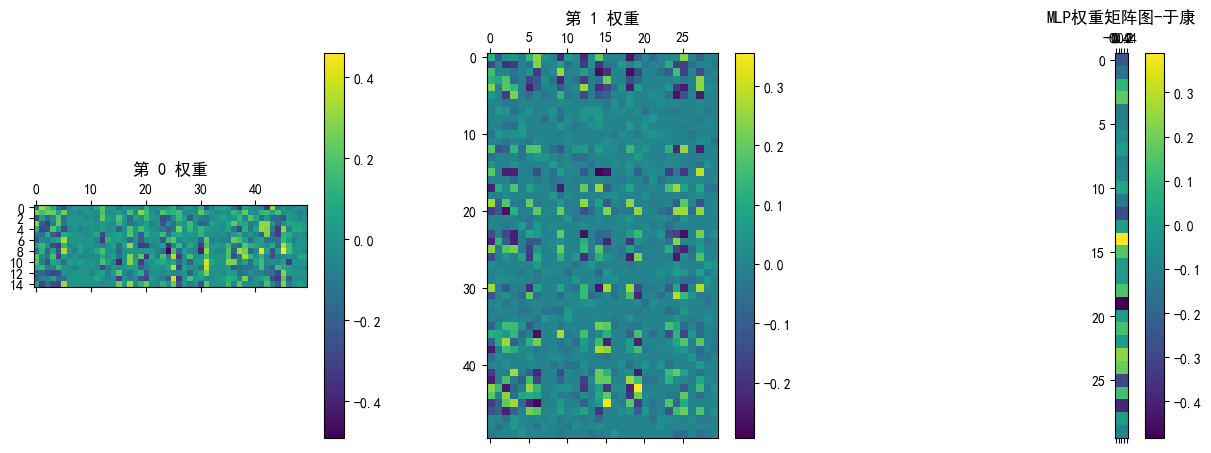

In [5]:
# 可视化权重矩阵
weights = mlp_clf.coefs_
# 绘制权重矩阵
fig, axes = plt.subplots(1, len(weights), figsize=(15, 5))
for i, (ax, weight) in enumerate(zip(axes, weights)):
    cax = ax.matshow(weight, cmap='viridis')
    fig.colorbar(cax, ax=ax)
    ax.set_title(f'第 {i} 权重')
plt.title("MLP权重矩阵图-于康")
plt.show()

训练集和测试集的准确率对比

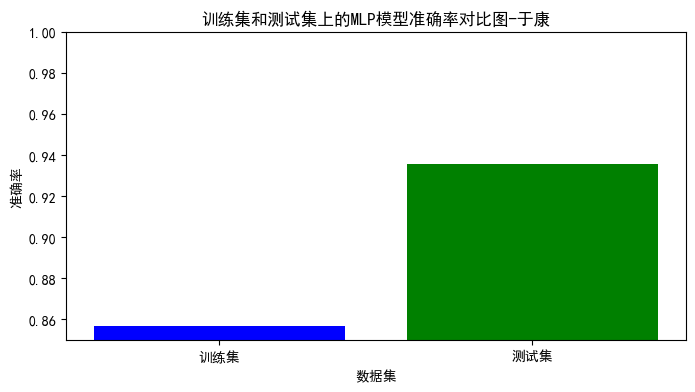

In [6]:
# 绘制训练集和测试集的准确率图像
plt.figure(figsize=(8, 4))
plt.bar(['训练集', '测试集'], [train_accuracy_mlp, test_accuracy_mlp], color=['blue', 'green'])
plt.xlabel("数据集")
plt.ylabel("准确率")
plt.title("训练集和测试集上的MLP模型准确率对比图-于康")
plt.ylim([0.85, 1])
plt.show()

从图中可以看到，训练好的模型在训练集的准确率达到85%以上，然而在测试集的准确率却接近94%。经过我的分析，我想可能是由于训练集的规模过小的原因，模型可能无法充分学习到数据的特征，导致在训练集上的精度较低。而在测试集上，由于模型可能更容易捕捉到数据的一般规律，因此表现会更好。后续有待改进。

ROC曲线

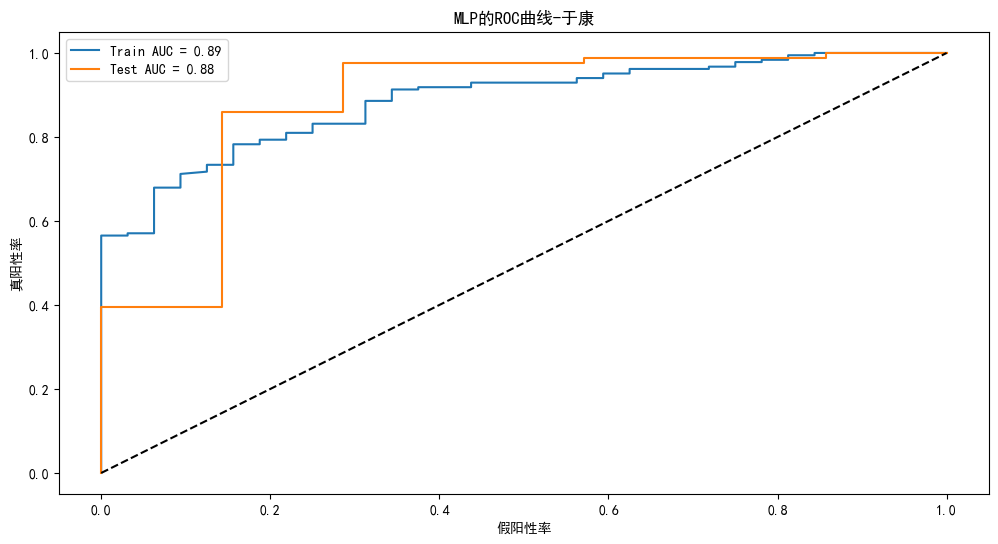

In [7]:
# 绘制ROC曲线
plt.figure(figsize=(12, 6))
plt.plot(fpr_train_mlp, tpr_train_mlp, label=f'Train AUC = {auc_train_mlp:.2f}')
plt.plot(fpr_test_mlp, tpr_test_mlp, label=f'Test AUC = {auc_test_mlp:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("假阳性率")
plt.ylabel("真阳性率")
plt.title("MLP的ROC曲线-于康")
plt.legend()
plt.show()

从图中可以看出，训练的MLP模型在训练集上的AUC值为0.89，在测试集上的AUC值为0.88，都较为接近1，由此可见模型的分类效果较好。

损失变化图线

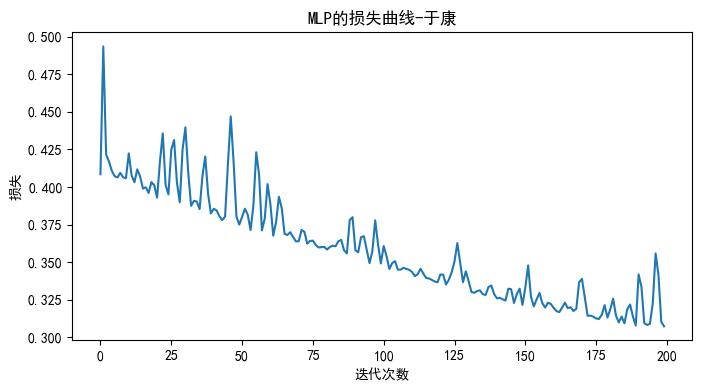

In [8]:
# 绘制损失的变化曲线
plt.figure(figsize=(8, 4))
plt.plot(mlp_clf.loss_curve_)
plt.xlabel('迭代次数')
plt.ylabel('损失')
plt.title('MLP的损失曲线-于康')
plt.show()

由MLP的损失曲线图可以看出，模型的损失随着迭代次数的增加，总体呈下降趋势。

混淆矩阵

<Figure size 600x600 with 0 Axes>

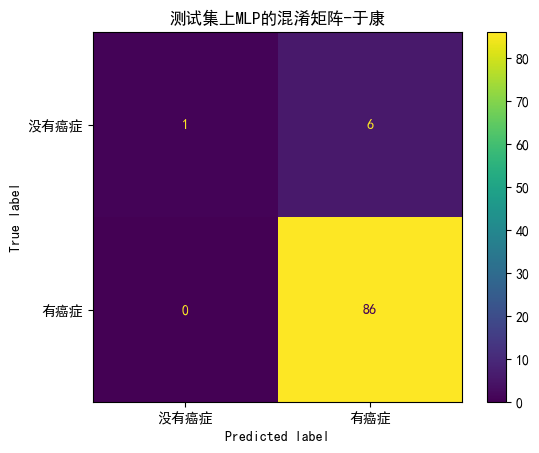

In [9]:
# 绘制模型在测试集的混淆矩阵
cm = confusion_matrix(y_test, y_test_pred_mlp)
plt.figure(figsize=(6, 6))
ConfusionMatrixDisplay(cm, display_labels=['没有癌症', '有癌症']).plot(values_format='d')
plt.title('测试集上MLP的混淆矩阵-于康')
plt.show()

从图中可以看出，模型的预测错误主要出现在把没有癌症的人预测为有肺癌的人，后续可以从这一个方面做针对性的改进

## 2.梯度提升模型
2022216503-于康

加载数据集

In [10]:
import pandas as pd
# 加载数据集
lung_cancer_data = pd.read_csv('survey lung cancer.csv')

处理数据集

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, auc
# 对分类变量进行编码
le_gender = LabelEncoder()
le_cancer = LabelEncoder()
lung_cancer_data['GENDER'] = le_gender.fit_transform(lung_cancer_data['GENDER'])
lung_cancer_data['LUNG_CANCER'] = le_cancer.fit_transform(lung_cancer_data['LUNG_CANCER'])
# 定义特征和目标变量
X = lung_cancer_data.drop('LUNG_CANCER', axis=1)
y = lung_cancer_data['LUNG_CANCER']

划分训练集和测试集

In [12]:
# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

训练模型和相关计算

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
# 训练梯度提升分类器
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)
# 使用梯度增强预测训练和测试数据
y_train_pred_gb = gb_clf.predict(X_train)
y_test_pred_gb = gb_clf.predict(X_test)
# 预测梯度增强的概率
y_train_proba_gb = gb_clf.predict_proba(X_train)[:, 1]
y_test_proba_gb = gb_clf.predict_proba(X_test)[:, 1]
# 计算准确度
train_accuracy_gb = accuracy_score(y_train, y_train_pred_gb)
test_accuracy_gb = accuracy_score(y_test, y_test_pred_gb)
# 训练集和测试集的ROC曲线和AUC
fpr_train_gb, tpr_train_gb, _ = roc_curve(y_train, y_train_proba_gb)
auc_train_gb = auc(fpr_train_gb, tpr_train_gb)
fpr_test_gb, tpr_test_gb, _ = roc_curve(y_test, y_test_proba_gb)
auc_test_gb = auc(fpr_test_gb, tpr_test_gb)

训练集和测试集的准确度对比

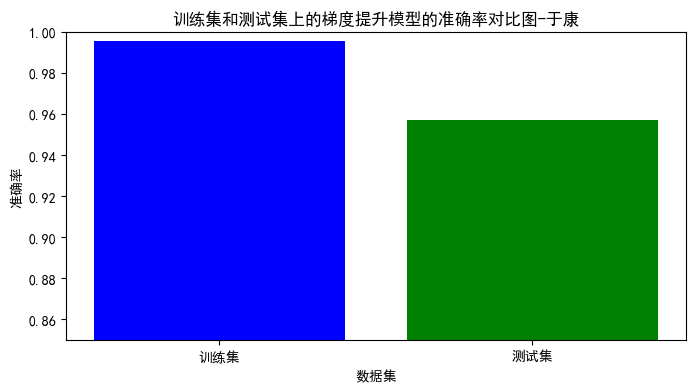

In [14]:
# 训练集和测试集的准确度对比
plt.figure(figsize=(8, 4))
plt.bar(['训练集', '测试集'], [train_accuracy_gb, test_accuracy_gb], color=['blue', 'green'])
plt.xlabel('数据集')
plt.ylabel('准确率')
plt.title('训练集和测试集上的梯度提升模型的准确率对比图-于康')
plt.ylim([0.85, 1])
plt.show()

从图中可以看出，模型在训练集和测试集上的准确率都达到了95%以上，其中模型在训练集上的准确率达到了99%，由此可见，训练的模型具有较强的泛化能力

ROC曲线

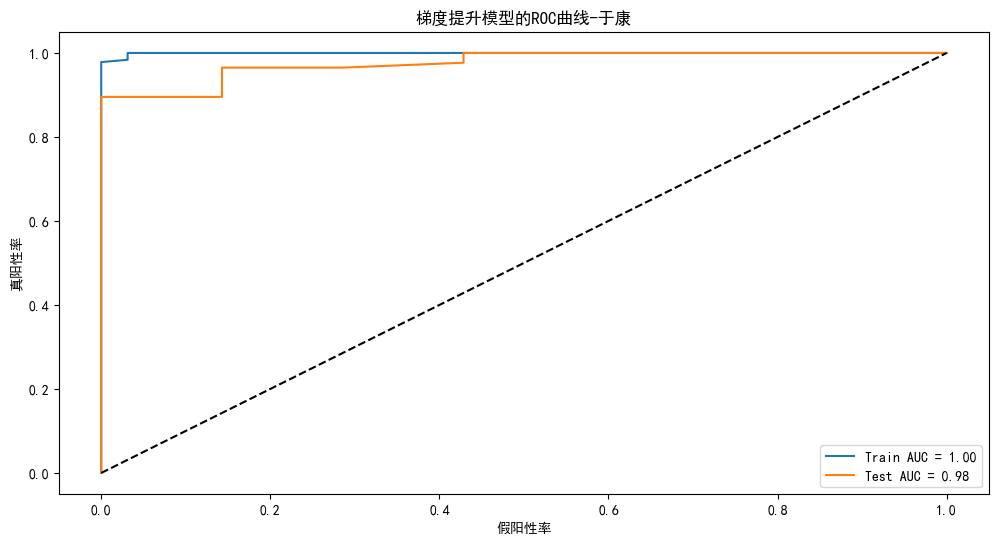

In [15]:
# 绘制ROC曲线
plt.figure(figsize=(12, 6))
plt.plot(fpr_train_gb, tpr_train_gb, label=f'Train AUC = {auc_train_gb:.2f}')
plt.plot(fpr_test_gb, tpr_test_gb, label=f'Test AUC = {auc_test_gb:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('假阳性率')
plt.ylabel('真阳性率')
plt.title('梯度提升模型的ROC曲线-于康')
plt.legend()
plt.show()

从图中可以看出，训练的梯度提升模型在训练集上的AUC值近乎为1.00，在测试集上的AUC值为0.98，都较为非常1，由此可见模型的分类效果非常好。

准确度变化曲线

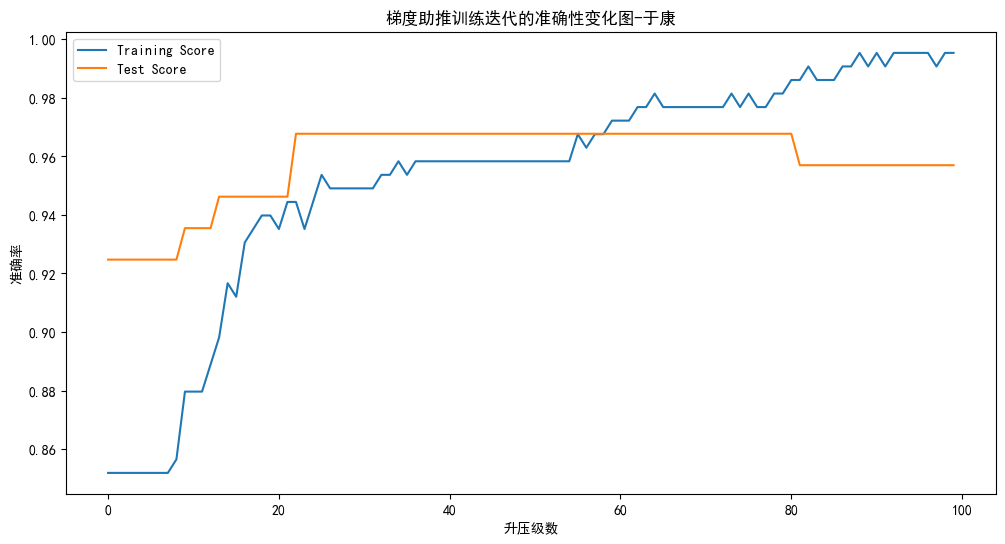

In [16]:
# 绘制准确度随迭代而变化
train_score = np.empty(len(gb_clf.estimators_))
test_score = np.empty(len(gb_clf.estimators_))

for i, pred in enumerate(gb_clf.staged_predict(X_train)):
    train_score[i] = accuracy_score(y_train, pred)

for i, pred in enumerate(gb_clf.staged_predict(X_test)):
    test_score[i] = accuracy_score(y_test, pred)

plt.figure(figsize=(12, 6))
plt.plot(train_score, label='Training Score')
plt.plot(test_score, label='Test Score')
plt.xlabel('升压级数')
plt.ylabel('准确率')
plt.title('梯度助推训练迭代的准确性变化图-于康')
plt.legend()
plt.show()

由上图可以看出，梯度提升模型在训练集和测试集上的准确率都随着升压级数的增加而整体呈上升趋势

## 3.逻辑回归模型
2022216392-李鑫煜

### 导入所需的库

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from joblib import dump
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, cohen_kappa_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

###  数据探索

In [18]:
lung_cancer_data = pd.read_csv('survey lung cancer.csv')

### 获取数据集的基本信息

In [19]:
lung_cancer_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [20]:
print(lung_cancer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [21]:
print(lung_cancer_data.describe())

              AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  309.000000  309.000000      309.000000  309.000000     309.000000   
mean    62.673139    1.563107        1.569579    1.498382       1.501618   
std      8.210301    0.496806        0.495938    0.500808       0.500808   
min     21.000000    1.000000        1.000000    1.000000       1.000000   
25%     57.000000    1.000000        1.000000    1.000000       1.000000   
50%     62.000000    2.000000        2.000000    1.000000       2.000000   
75%     69.000000    2.000000        2.000000    2.000000       2.000000   
max     87.000000    2.000000        2.000000    2.000000       2.000000   

       CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  ALCOHOL CONSUMING  \
count       309.000000  309.000000  309.000000  309.000000         309.000000   
mean          1.504854    1.673139    1.556634    1.556634           1.556634   
std           0.500787    0.469827    0.497588    0.497588           0.4

### 数据探索 - 可视化数值型属性的直方图

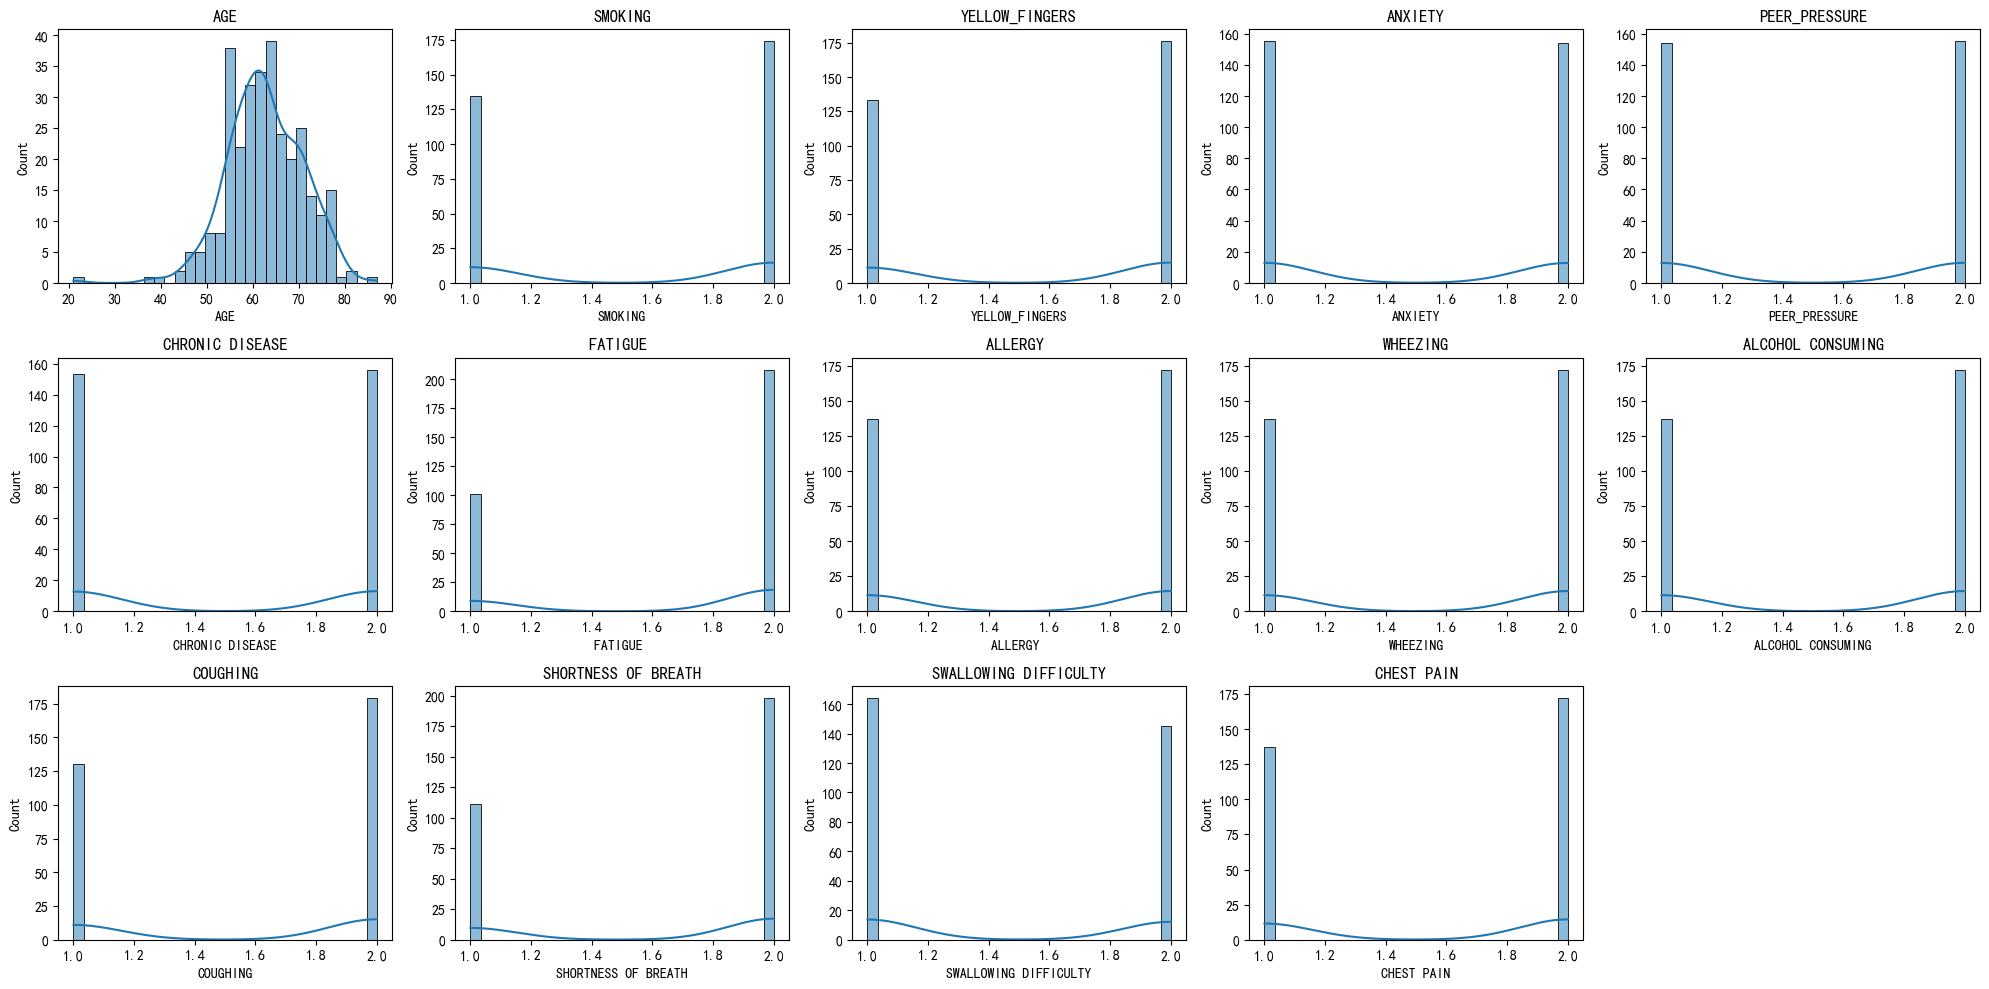

In [22]:
numerical_columns = lung_cancer_data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(20, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, len(numerical_columns)//3 + 1, i)
    sns.histplot(data=lung_cancer_data, x=column, bins=30, kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

###  数据预处理

In [23]:
# 数据预处理函数
def encode_and_fill_missing(data, columns):
    le = LabelEncoder()
    for column in columns:
        if data[column].dtype == 'object':
            data[column] = le.fit_transform(data[column].fillna(data[column].mode()[0]))
    return data
categorical_columns = lung_cancer_data.select_dtypes(include=['object']).columns
lung_cancer_data = encode_and_fill_missing(lung_cancer_data, categorical_columns)

# 特征和目标变量
X = lung_cancer_data.drop('LUNG_CANCER', axis=1)
y = lung_cancer_data['LUNG_CANCER']

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 特征选择
estimator = DecisionTreeClassifier(random_state=42)
selector = RFE(estimator, n_features_to_select=5, step=1)
X_selected = selector.fit_transform(X_scaled, y)

###  划分训练集和测试集

In [24]:
test_size = 0.3
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=test_size, random_state=random_state)

### 交叉验证

In [25]:
log_reg = LogisticRegression(random_state=42)
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores.mean())

Cross-validation scores: 0.856659619450317


### 执行模型训练与评估

In [26]:
def train_and_evaluate_model(X_train, X_test, y_train, y_test, model):
    # 使用网格搜索进行超参数调优
    param_grid = {
        'C': [0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag']  # 只保留支持l2的求解器
    }
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1', verbose=1)
    grid_search.fit(X_train, y_train)
    
    # 使用网格搜索找到的最佳参数来训练模型
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # 返回最佳模型和预测结果
    return best_model, y_pred, grid_search

# 调用函数进行模型训练和评估
best_model, y_pred, grid_search = train_and_evaluate_model(X_train, X_test, y_train, y_test, LogisticRegression(random_state=42))

# 打印分类报告
print(classification_report(y_test, y_pred))

# 打印最佳参数
print("Best parameters found by GridSearchCV:", grid_search.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
              precision    recall  f1-score   support

           0       0.50      0.14      0.22         7
           1       0.93      0.99      0.96        86

    accuracy                           0.92        93
   macro avg       0.72      0.57      0.59        93
weighted avg       0.90      0.92      0.90        93

Best parameters found by GridSearchCV: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


在进行逻辑回归模型的网格搜索超参数调优过程中，得到了一些关键的评估指标和最佳参数结果。
交叉验证环节中，模型对12种不同的参数组合进行了5折验证，共计进行了60次模型拟合。
分类报告显示，模型在两个类别上的表现存在显著差异。对于类别1，模型展现出了极高的精确率（93%）和召回率（99%），这表明模型在大多数情况下能够准确地识别类别1的样本。
然而，对于类别0，模型的精确率仅为50%，召回率仅为14%，F1分数也只有22%，这暗示模型在识别类别0上存在较大困难。
模型的整体准确率为92%，意味着在整个测试集上，模型正确预测了93个样本中的86个。
宏平均和加权平均指标分别给出了对所有类别统一视图和根据样本数量加权后的模型性能评估。宏平均F1分数为59%，而加权平均F1分数为90%。
这表明模型在多数样本上表现良好，但在少数样本上存在问题。
通过GridSearchCV进行超参数调优后，发现最佳参数组合为：正则化参数C设为0.1，采用L2正则化（penalty: 'l2'），并使用liblinear作为求解器（solver: 'liblinear'）。
这些参数为模型提供了在当前数据集和评估标准下的最佳性能。
因此，尽管模型在多数样本上表现良好，但我们需要关注模型在少数类别上的性能不足。可能的改进方向包括对类别不平衡问题采取措施、进一步的特征工程、来提高模型在所有类别上的整体性能。
此外，对于模型为何在类别0上表现不佳，需要进行更深入的错误分析，以便找到提升模型性能的有效策略。

In [27]:
### 绘制ROC曲线

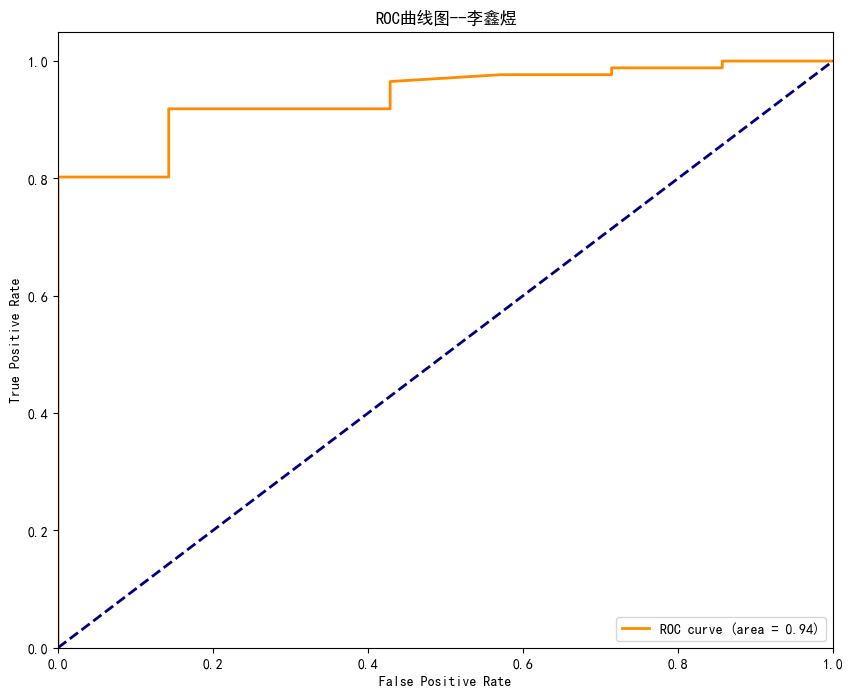

In [28]:
y_proba = best_model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
auc_score = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC曲线图--李鑫煜')
plt.legend(loc="lower right")
plt.show()

ROC曲线显示出随着阈值的调整，模型在真正例率和假正例率之间取得了较好的平衡，这表明模型具有较好的分类能力。 图像中显示的ROC曲线下面积（AUC）为0.94，这是一个非常高的值，表明模型在区分两个类别方面表现出色。 AUC值的范围从0到1，其中1表示完美分类器，0.5表示没有分类能力的模型。因此，AUC值为0.94意味着模型的分类性能远高于随机猜测，具有很高的可信度。
然而，尽管高AUC值通常表明模型性能良好，但在实际应用中，还需要考虑其他因素。例如，如果数据集中存在类别不平衡，即使AUC很高，模型在少数类上的性能也可能不尽如人意。
此外，选择最佳的分类阈值也很重要，因为它直接影响到模型的预测结果。在实际应用中，可能需要根据业务需求和成本效益分析来确定最合适的阈值。


### 绘制混淆矩阵图

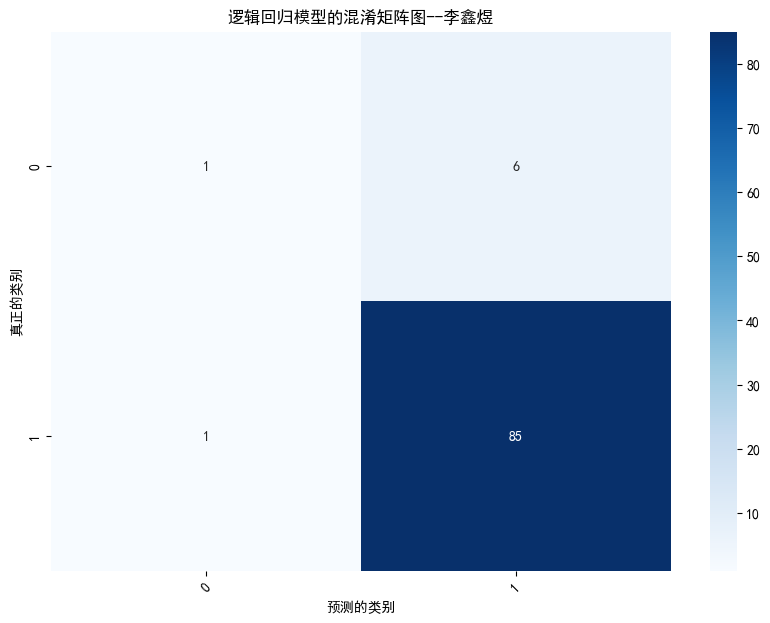

In [29]:
# 假设 y_test 和 y_pred 是测试集真实标签和模型预测的标签
conf_matrix = confusion_matrix(y_test, y_pred)

# 从y_test中提取所有类别
classes = np.unique(y_test)

# 绘制混淆矩阵
plt.figure(figsize=(10, 7))  # 可以根据需要调整图像大小
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, 
            xticklabels=classes, yticklabels=classes)
plt.title('逻辑回归模型的混淆矩阵图--李鑫煜')

# 添加轴标签
plt.xlabel('预测的类别')
plt.ylabel('真正的类别')

# 显示完整标签
plt.xticks(rotation=45)  # 旋转x轴标签，以便于阅读

# 显示图表
plt.show()

### 进一步评估模型在测试集上的性能

In [30]:
# 准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# 精确率、召回率和F1分数（针对每个类别）
precision = precision_score(y_test, y_pred, average=None)  # None 返回每个类别的精确率
recall = recall_score(y_test, y_pred, average=None)        # None 返回每个类别的召回率
f1 = f1_score(y_test, y_pred, average=None)               # None 返回每个类别的F1分数

print(f"Precision (per class): {precision}")
print(f"Recall (per class): {recall}")
print(f"F1 Score (per class): {f1}")

# 支持度（每个类别在测试集中的样本数量）
support = np.bincount(y_test)
print(f"Support: {support}")

Accuracy: 0.9247311827956989
Precision (per class): [0.5        0.93406593]
Recall (per class): [0.14285714 0.98837209]
F1 Score (per class): [0.22222222 0.96045198]
Support: [ 7 86]


模型的准确率为92.47%，这意味着模型正确预测的样本占总测试样本的比例很高。这通常表示模型整体上表现良好。
精确率有两个值，分别为0.50和0.93406593。第一个值（0.50）表示当模型预测样本为类别1时，实际上只有50%的样本确实属于类别1。
第二个值（0.93406593）表示当模型预测样本为类别2时，有约93.41%的样本确实属于类别2。这表明模型在预测类别2时非常准确，但在预测类别1时存在较大的不确定性。
召回率同样有两个值，分别为0.14285714和0.98837209。第一个值（0.14285714）表示只有约14.29%的实际类别1样本被模型正确识别。
第二个值（0.98837209）表示几乎所有（约98.84%）的实际类别2样本都被模型正确识别。
这表明模型在检测类别1上存在问题，可能有很多类别1的样本被错误地分类为其他类别。
F1分数是精确率和召回率的调和平均值，提供了一个综合考虑两者的指标。
第一个F1分数（0.22222222）非常低，表明类别1的预测存在较大问题。
第二个F1分数（0.96045198）非常高，表明模型在预测类别2上表现非常好。
支持度显示类别1有7个样本，类别2有86个样本。这表明测试集中类别2的样本数量远多于类别1，存在类别不平衡的问题。 

## 4.支持向量机SVM
2022216392-李鑫煜

### 导入所需的库

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import warnings
from sklearn.metrics import precision_score, recall_score
import pandas as pd
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [32]:
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

### 数据探索

In [33]:
lung_cancer_data = pd.read_csv('survey lung cancer.csv')

In [34]:
### 获取数据集的基本信息

In [35]:
lung_cancer_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [36]:
lung_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [37]:
print(lung_cancer_data.describe())

              AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  309.000000  309.000000      309.000000  309.000000     309.000000   
mean    62.673139    1.563107        1.569579    1.498382       1.501618   
std      8.210301    0.496806        0.495938    0.500808       0.500808   
min     21.000000    1.000000        1.000000    1.000000       1.000000   
25%     57.000000    1.000000        1.000000    1.000000       1.000000   
50%     62.000000    2.000000        2.000000    1.000000       2.000000   
75%     69.000000    2.000000        2.000000    2.000000       2.000000   
max     87.000000    2.000000        2.000000    2.000000       2.000000   

       CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  ALCOHOL CONSUMING  \
count       309.000000  309.000000  309.000000  309.000000         309.000000   
mean          1.504854    1.673139    1.556634    1.556634           1.556634   
std           0.500787    0.469827    0.497588    0.497588           0.4

count 列显示了每列的非缺失值数量。每列都有 309 个非缺失值，这意味着数据集有 309 个样本。 mean 列提供了每列的平均值。通过这些值可以了解每个特征的平均水平。例如，SMOKING 的平均值为 1.56。
标std 列提供了每列的标准差，它衡量数据的分散程度。较小的标准差意味着数据点更紧密地围绕平均值聚集。
第25百分位数（25%）：25% 的数据点小于或等于此值，这有助于了解数据的下四分位数。
50% 列是中位数，即数据的中心点，50% 的数据点小于或等于此值。 第75百分位数（75%）：75% 的数据点小于或等于此值，这有助于了解数据的上四分位数。
从四分位数来看，许多特征的最小值和第25百分位数都是 1，中位数和第75百分位数都是 2，这表明大多数样本在这些特征上的评分为最低或最高，可能表明这些特征的评分分布是两极分化的。
虽然 describe() 不直接提供异常值信息，但通过观察标准差和四分位数，我们可以对数据中的异常值有一个大致的了解。
如果某些特征的平均值接近于 1 或 2，这可能表明数据在这些特征上是不平衡的，即大多数样本倾向于选择同一等级。


### 数据探索 - 可视化数值型属性的直方图

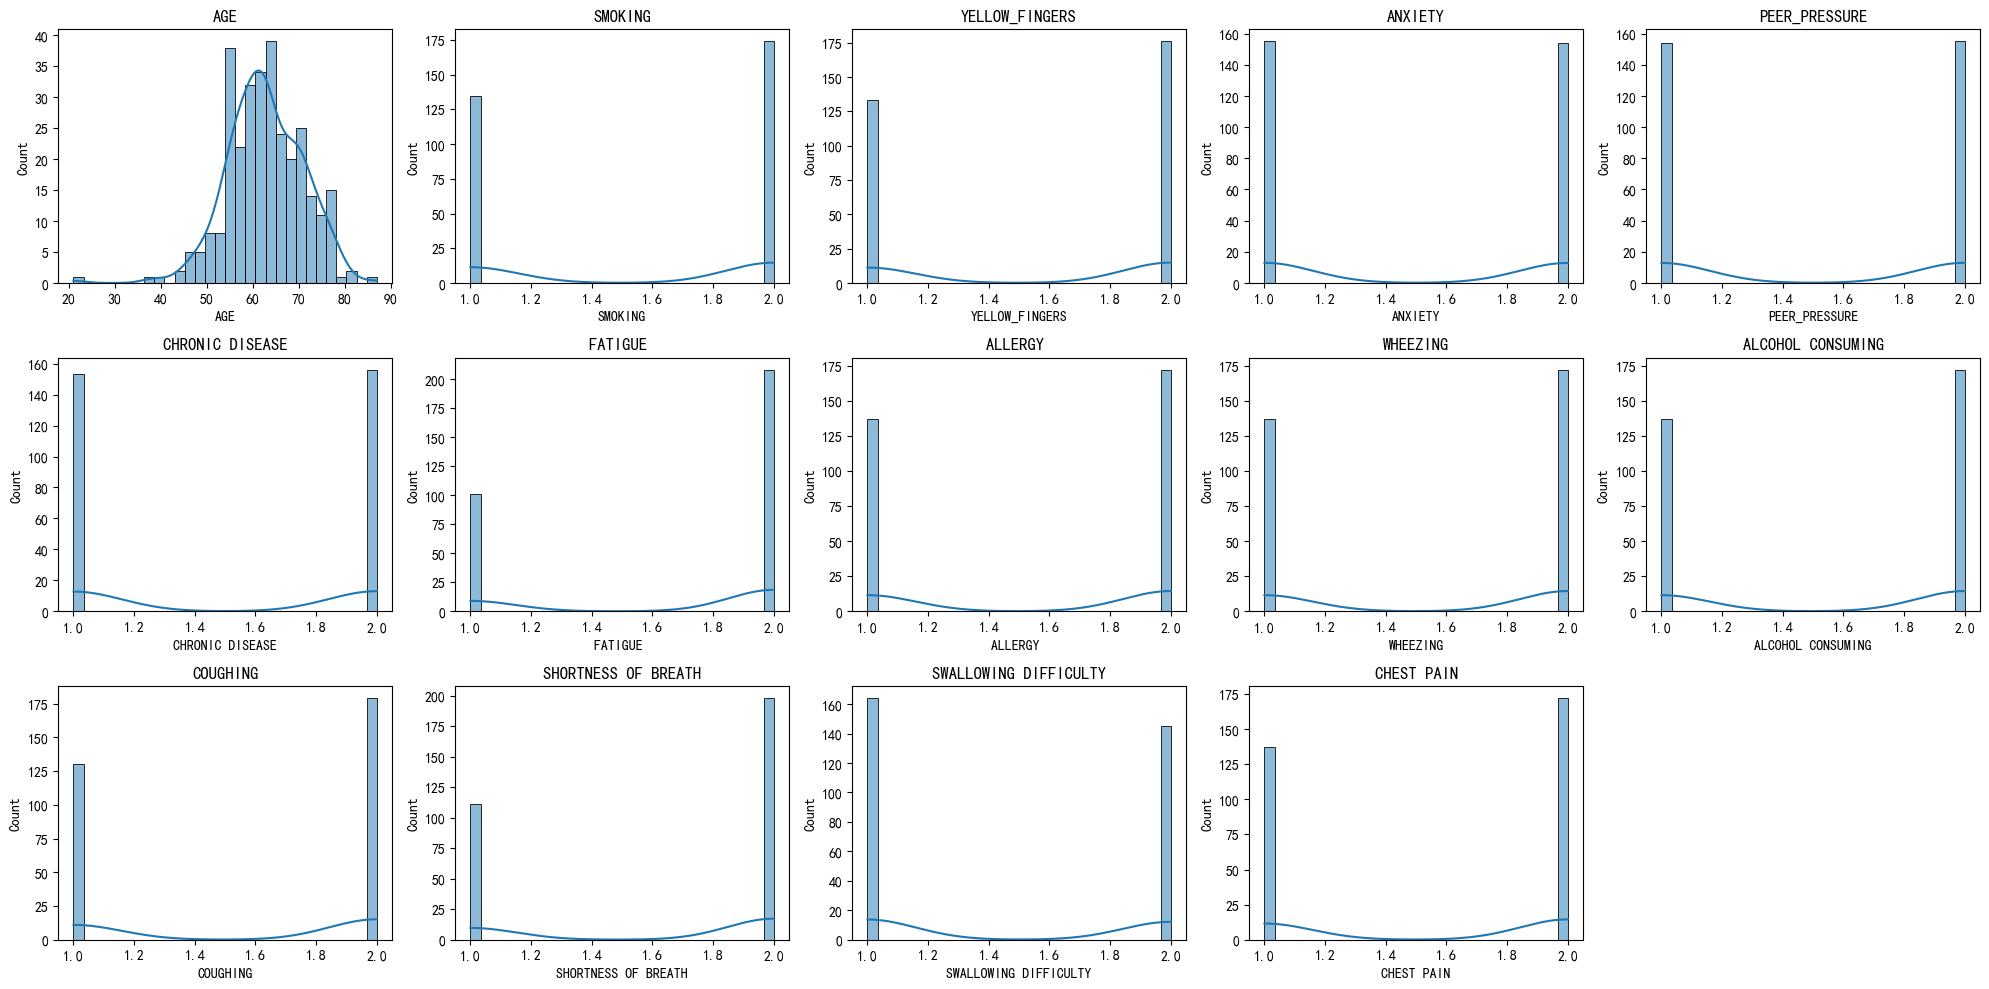

In [38]:
numerical_columns = lung_cancer_data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(20, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, len(numerical_columns)//3 + 1, i)
    sns.histplot(data=lung_cancer_data, x=column, bins=30, kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

In [39]:
le_gender = LabelEncoder()
le_cancer = LabelEncoder()
lung_cancer_data['GENDER'] = le_gender.fit_transform(lung_cancer_data['GENDER'])  # 性别编码
lung_cancer_data['LUNG_CANCER'] = le_cancer.fit_transform(lung_cancer_data['LUNG_CANCER'])  # 肺癌状态编码

### 定义特征变量X和目标变量y

In [40]:
X = lung_cancer_data.drop('LUNG_CANCER', axis=1)  # 特征数据，去掉LUNG_CANCER列
y = lung_cancer_data['LUNG_CANCER']  # 目标数据，即肺癌状态

### 划分数据集为训练集和测试集，比例为7:3

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 创建一个包含标准尺度和SVM的管道¶
#### StandardScaler进行特征缩放，SVC为支持向量机分类器

In [42]:
svm_clf = make_pipeline(StandardScaler(), SVC(probability=True, random_state=42))
svm_clf.fit(X_train, y_train)  # 训练模型

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(probability=True, random_state=42))])

### 使用训练好的模型进行预测

In [43]:
y_train_pred_svm = svm_clf.predict(X_train)  # 训练集预测
y_test_pred_svm = svm_clf.predict(X_test)  # 测试集预

### 计算模型的准确率

In [44]:
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)  # 训练集准确率
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)  # 测试集准确率

### 可视化模型的准确率

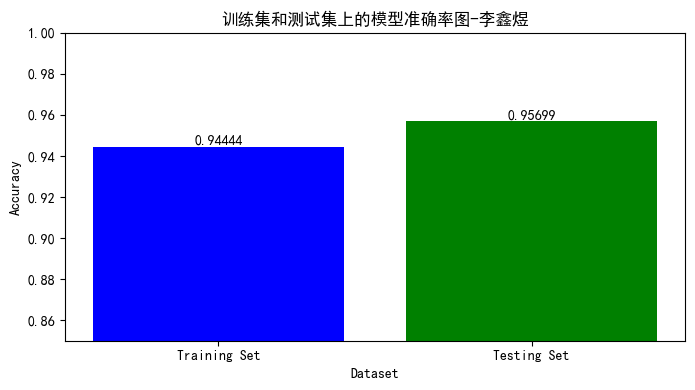

In [45]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.figure(figsize=(8, 4))  # 设置图形的大小
bar = plt.bar(['Training Set', 'Testing Set'], [train_accuracy_svm, test_accuracy_svm], color=['blue', 'green'])  # 绘制柱状图

# 为每个柱状添加数值标签
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, round(height, 5), ha='center', va='bottom')

add_value_labels(bar)

plt.xlabel('Dataset')  # 设置x轴标签
plt.ylabel('Accuracy')  # 设置y轴标签
plt.title('训练集和测试集上的模型准确率图-李鑫煜')  # 设置图表标题
plt.ylim([0.85, 1])  # 设置y轴的范围
plt.show()      # 显示图表

这里能够很明显地观察到，模型在训练集上的准确率为0.94444，在测试集上的准确率为0.95699。
这表明了模型在训练集和测试集上都有较好的表现，泛化能力较强。

### 预测SVM的概率

In [46]:
y_train_proba_svm = svm_clf.predict_proba(X_train)[:, 1]  # 获取训练集的预测概率
y_test_proba_svm = svm_clf.predict_proba(X_test)[:, 1]  # 获取测试集的预测概率

### 计算ROC曲线和AUC值

In [47]:
fpr_train_svm, tpr_train_svm, _ = roc_curve(y_train, y_train_proba_svm)  # 训练集的ROC曲线
auc_train_svm = auc(fpr_train_svm, tpr_train_svm)  # 训练集的AUC值
fpr_test_svm, tpr_test_svm, _ = roc_curve(y_test, y_test_proba_svm)  # 测试集的ROC曲线
auc_test_svm = auc(fpr_test_svm, tpr_test_svm)  # 测试集的AUC值

### 可视化ROC曲线

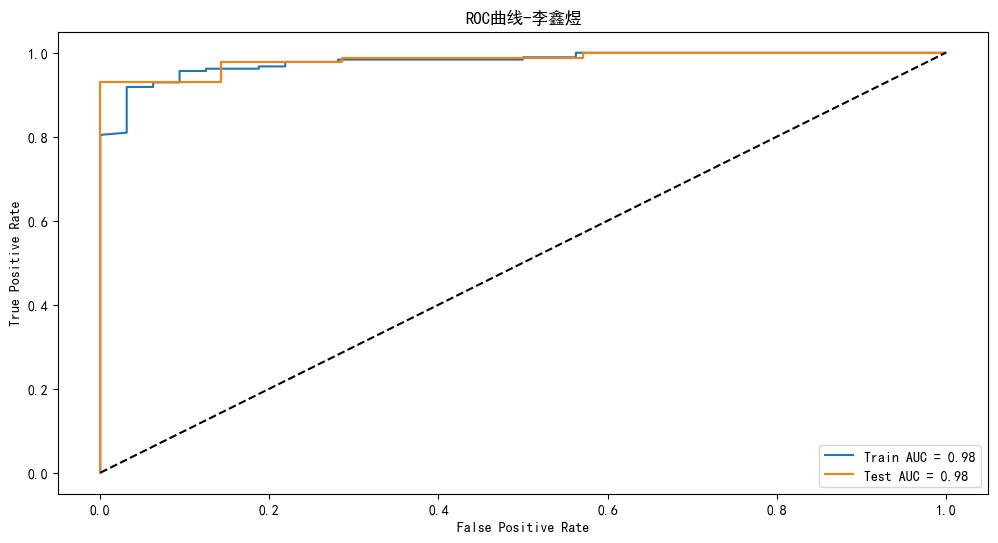

In [48]:
plt.figure(figsize=(12, 6))  # 设置图形的大小
plt.plot(fpr_train_svm, tpr_train_svm, label=f'Train AUC = {auc_train_svm:.2f}')  # 绘制训练集的ROC曲线
plt.plot(fpr_test_svm, tpr_test_svm, label=f'Test AUC = {auc_test_svm:.2f}')  # 绘制测试集的ROC曲线
plt.plot([0, 1], [0, 1], 'k--')  # 绘制参考线
plt.xlabel('False Positive Rate')  # 设置x轴标签
plt.ylabel('True Positive Rate')  # 设置y轴标签
plt.title('ROC曲线-李鑫煜')  # 设置图表标题
plt.legend()  # 显示图例
plt.show()

图像中展示了两条曲线，一条代表训练集上的ROC曲线，另一条代表测试集上的ROC曲线。
图像中提供了两条曲线的AUC值。训练集的AUC值为0.96，测试集的AUC值为0.99。
AUC值的范围从0到1，其中1表示完美分类器，0.5表示随机分类器。因此，这两个AUC值都非常高，表明模型在训练集和测试集上都有很好的性能。
图像的x轴代表假正例率，也就是将负类错误地分类为正类的比例。
图像的y轴代表真正例率，也就是将正类正确分类的比例，也称为召回率。
测试集上的ROC曲线非常接近于y轴，这意味着在不同的FPR水平下，模型都能保持较高的TPR，这表明模型具有很好的区分能力。
测试集上的AUC值（0.99）略高于训练集上的AUC值（0.96），这表明模型不仅在训练数据上表现良好，而且在未见过的数据上也有很好的泛化能力。
两条ROC曲线的形状和位置表明模型在训练集和测试集上都表现出了稳健性，没有出现过拟合或欠拟合的迹象。 

### 使用前两个特征可视化决策边界¶

In [49]:
X_train_2d = X_train.iloc[:, :2]  # 取前两个特征进行二维可视化
svm_clf_2d = make_pipeline(StandardScaler(), SVC(random_state=42))  # 创建SVM分类器的管道
svm_clf_2d.fit(X_train_2d, y_train)  # 训练模型

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=42))])

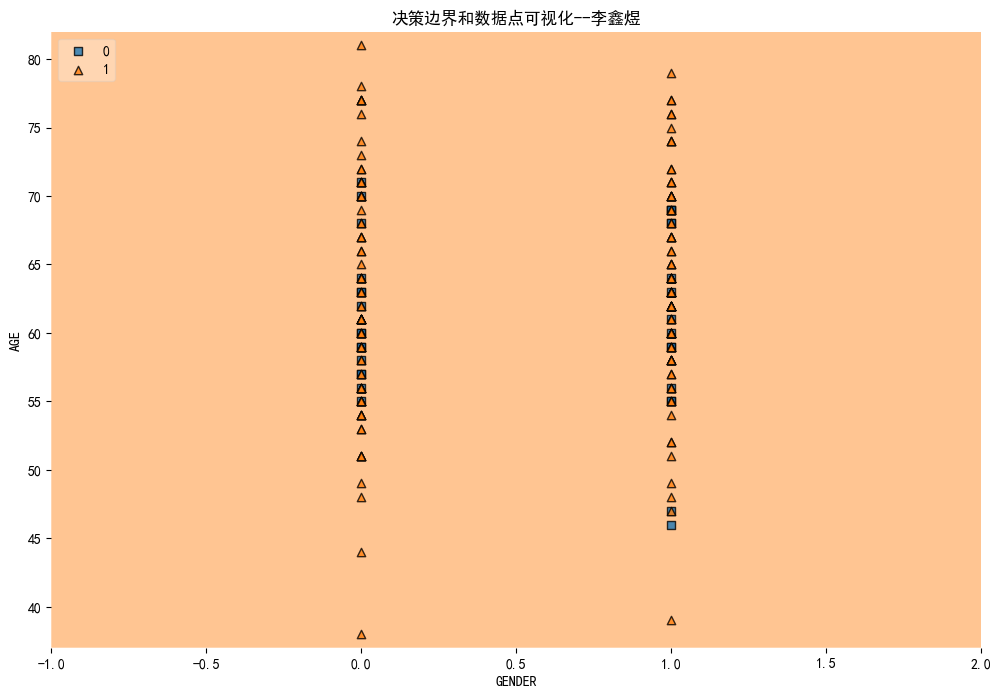

In [50]:
plt.figure(figsize=(12, 8))  # 设置图形的大小
plot_decision_regions(X_train_2d.values, y_train.values, clf=svm_clf_2d, legend=2)  # 绘制决策边界
plt.xlabel(X_train_2d.columns[0])  # 设置x轴标签
plt.ylabel(X_train_2d.columns[1])  # 设置y轴标签
plt.title('决策边界和数据点可视化--李鑫煜')  
plt.show()

图像展示了一个决策边界，这是支持向量机（SVM）模型用来区分不同类别的线或超平面。在这个二维空间中，SVM找到了一个边界，将两个类别分开。
数据点被清晰地分开，没有重叠，这意味着模型的决策边界是有效的。

### 计算并可视化混淆矩阵

Recall (True Positive Rate): 0.99
Precision: 0.97


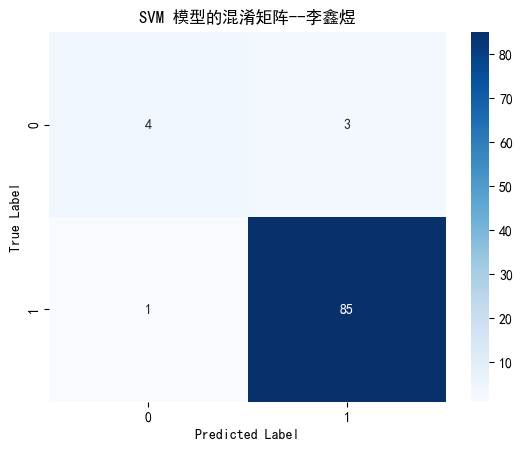

In [51]:
# 计算混淆矩阵
cm = confusion_matrix(y_test, y_test_pred_svm)

# 计算召回率和精确率
# 由于这是二分类问题，我们指定pos_label为1，即肺癌状态为正类
recall = recall_score(y_test, y_test_pred_svm, pos_label=1)
precision = precision_score(y_test, y_test_pred_svm, pos_label=1)
# 打印召回率和精确率
print(f"Recall (True Positive Rate): {recall:.2f}")

print(f"Precision: {precision:.2f}")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # 使用seaborn绘制热图
plt.title('SVM 模型的混淆矩阵--李鑫煜')  # 设置图表标题
plt.xlabel('Predicted Label')  # 设置x轴标签
plt.ylabel('True Label')  # 设置y轴标签
plt.show()

可以看到，召回率为0.99，精确度（Precision）为0.97。
高召回率说明模型能够识别绝大多数的正类样本（例如，患病的案例）。这意味着模型漏诊的可能性很低，几乎所有实际的正类都被正确地识别出来。
高精确度说明在所有被模型预测为正类的样本中，绝大多数实际上是正类。这意味着模型的预测结果非常可信，当它预测一个样本为正类时，这个预测很可能是正确的。
召回率和精确度都非常高，表明模型在真正例和假正例之间取得了很好的平衡。

## 5.朴素贝叶斯
2022217773-刘佳伦

### 1.加载并初步查看肺癌调查数据集
  
&emsp;&emsp;在本节中，我们将从指定路径加载一个关于肺癌调查的数据集，并初步查看其前几行数据以及数据集的摘要信息。这有助于我们了解数据的大致情况，包括数据的结构、类型和缺失值等。此外，我们还将查看数值型数据的描述性统计信息，如均值、标准差、最小值、25%、50%、75%分位数以及最大值。

数据集包括309条记录，每条记录有16个特征。这些特征包括：  
GENDER - 性别（字符型）  
AGE - 年龄（整数型）  
SMOKING - 吸烟（二进制，1或2）  
YELLOW_FINGERS - 黄手指（二进制，1或2）  
ANXIETY - 焦虑（二进制，1或2）  
PEER_PRESSURE - 同辈压力（二进制，1或2）  
CHRONIC DISEASE - 慢性病（二进制，1或2）  
FATIGUE - 疲劳（二进制，1或2）  
ALLERGY - 过敏（二进制，1或2）  
WHEEZING - 哮喘（二进制，1或2）  
ALCOHOL CONSUMING - 饮酒（二进制，1或2）  
COUGHING - 咳嗽（二进制，1或2）  
SHORTNESS OF BREATH - 呼吸急促（二进制，1或2）  
SWALLOWING DIFFICULTY - 吞咽困难（二进制，1或2）  
CHEST PAIN - 胸痛（二进制，1或2）  
LUNG_CANCER - 肺癌（字符型，'YES' 或 'NO'） 

### 1.1获取数据并加载数据集

数据集来自该链接：https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer 

In [52]:
import pandas as pd

#加载数据集
lung_cancer_data = pd.read_csv('survey lung cancer.csv')

### 1.2快速查看数据结构

In [53]:
# 显示数据集的前5行信息
lung_cancer_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [54]:
#获取数据集的简单描述，如总行数，每个属性的类型和非空值的数量
lung_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [55]:
#显示属性摘要
lung_cancer_data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


### 2 处理数据集并训练模型

&emsp;&emsp;处理数据集中的分类变量，将其转换为适合模型训练的格式，并对数据集分为训练集和测试集，然后训练朴素贝叶斯模型。

2.1 导入必要的库

train_test_split：用于将数据集分割为训练集和测试集。
LabelEncoder：用于将分类变量（如文本）转换为数值型数据。
matplotlib.pyplot：用于数据可视化。
accuracy_score：用于计算分类准确率。
roc_curve 和 auc：用于计算ROC曲线和AUC值，以评估分类器的性能。
GaussianNB：高斯朴素贝叶斯分类器。


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.naive_bayes import GaussianNB

### 2.2 数据预处理

&emsp;&emsp;使用LabelEncoder将GENDER和LUNG_CANCER列中的文本数据转换为数值型数据，并且
分离出特征X（除LUNG_CANCER外的所有列）和目标变量y（LUNG_CANCER列）

In [57]:
#对分类变量进行编码
le_gender = LabelEncoder()
le_cancer = LabelEncoder()

# 使用LabelEncoder对'GENDER'列和'LUNG_CANCER'列进行编码，将性别文本和肺癌状态文本转换为数值
lung_cancer_data['GENDER'] = le_gender.fit_transform(lung_cancer_data['GENDER'])
lung_cancer_data['LUNG_CANCER'] = le_cancer.fit_transform(lung_cancer_data['LUNG_CANCER'])

#定义特征和目标变量
X = lung_cancer_data.drop('LUNG_CANCER', axis=1)# 特征X是除了'LUNG_CANCER'列的所有列 
y = lung_cancer_data['LUNG_CANCER']# 目标变量y是'LUNG_CANCER'列 

### 2.3 数据集分割
&emsp;&emsp;使用train_test_split将数据集分割为训练集（70%）和测试集（30%），并设置随机种子为42以保证结果的可复现性

In [58]:
#将数据集分割为训练集和测试集，测试集占30%，随机种子设为42 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 2.4 训练朴素贝叶斯模型
&emsp;&emsp;创建一个高斯朴素贝叶斯分类器实例nb_clf。
使用训练数据X_train和y_train拟合（训练）朴素贝叶斯模型。

In [59]:
#训练朴素贝叶斯模型
nb_clf = GaussianNB()# 创建一个高斯朴素贝叶斯分类器实例
nb_clf.fit(X_train, y_train)# 使用训练数据拟合（训练）朴素贝叶斯模型 

GaussianNB()

### 3. 数据探索和可视化特征

### 3.1计算每个特征的均值和标准差

&emsp;&emsp;以下这段代码的主要目的是根据数据集中的类别标签（即是否有癌症）来分组计算每个特征的平均值和标准差，并将这些信息整理成表格形式以供进一步分析。

In [60]:
#创建一个条件概率表
#这里我们为每一个特征在'没有癌症'和'有癌症'两个类别下的平均值创建一个表格来进行演示
prob_table = pd.DataFrame({
    
    # 'Feature'列存储特征名称，直接从X_train的列名中获取
    'Feature': X_train.columns,
    
    # 计算每个特征在'没有癌症'（y_train == 0）类别下的平均值
    'Mean in No Cancer': [X_train.loc[y_train == 0, f].mean() for f in X_train.columns],
    
    # 计算每个特征在'有癌症'（y_train == 1）类别下的平均值
    'Mean in Cancer': [X_train.loc[y_train == 1, f].mean() for f in X_train.columns]
})

# 根据类别标签分组计算每个特征的平均值和标准差  
# 创建一个新的DataFrame来存储每个特征在不同类别下的平均值和标准差
prob_stats = pd.DataFrame({
    
    # 'Feature'列存储特征名称，直接从X_train的列名中获取
    'Feature': X_train.columns,
    
    # 计算每个特征在'没有癌症'类别下的平均值，注意这里使用了整体计算而非列表推导
    'Mean in No Cancer': X_train[y_train == 0].mean(),
    
    # 计算每个特征在'没有癌症'类别下的标准差
    'Std in No Cancer': X_train[y_train == 0].std(),
    
    # 计算每个特征在'有癌症'类别下的平均值
    'Mean in Cancer': X_train[y_train == 1].mean(),
    
    # 计算每个特征在'有癌症'类别下的标准差 
    'Std in Cancer': X_train[y_train == 1].std()
}).reset_index(drop=True)

#显示条件概率统计表
print(prob_stats)

                  Feature  Mean in No Cancer  Std in No Cancer  \
0                  GENDER            0.50000          0.508001   
1                     AGE           60.93750          6.195407   
2                 SMOKING            1.50000          0.508001   
3          YELLOW_FINGERS            1.31250          0.470929   
4                 ANXIETY            1.34375          0.482559   
5           PEER_PRESSURE            1.31250          0.470929   
6         CHRONIC DISEASE            1.31250          0.470929   
7                FATIGUE             1.46875          0.507007   
8                ALLERGY             1.12500          0.336011   
9                WHEEZING            1.25000          0.439941   
10      ALCOHOL CONSUMING            1.18750          0.396558   
11               COUGHING            1.28125          0.456803   
12    SHORTNESS OF BREATH            1.50000          0.508001   
13  SWALLOWING DIFFICULTY            1.12500          0.336011   
14        

### 3.2 绘制条件概率统计条形图
&emsp;&emsp;这里展示了每个特征在不同类别（无肺癌和有肺癌）下的平均值，以及相应的标准差作为误差棒。这种可视化有助于直观地比较不同类别下每个特征的数值分布：
蓝色条形表示无肺癌类别,红色条形表示有肺癌类别，误差棒显示了每个类别中特征值的变异程度。通过这些图形，我们可以清楚地看到不同特征在有无肺癌的类别中的分布差异，这有助于了解哪些特征对于区分两个类别更为关键。

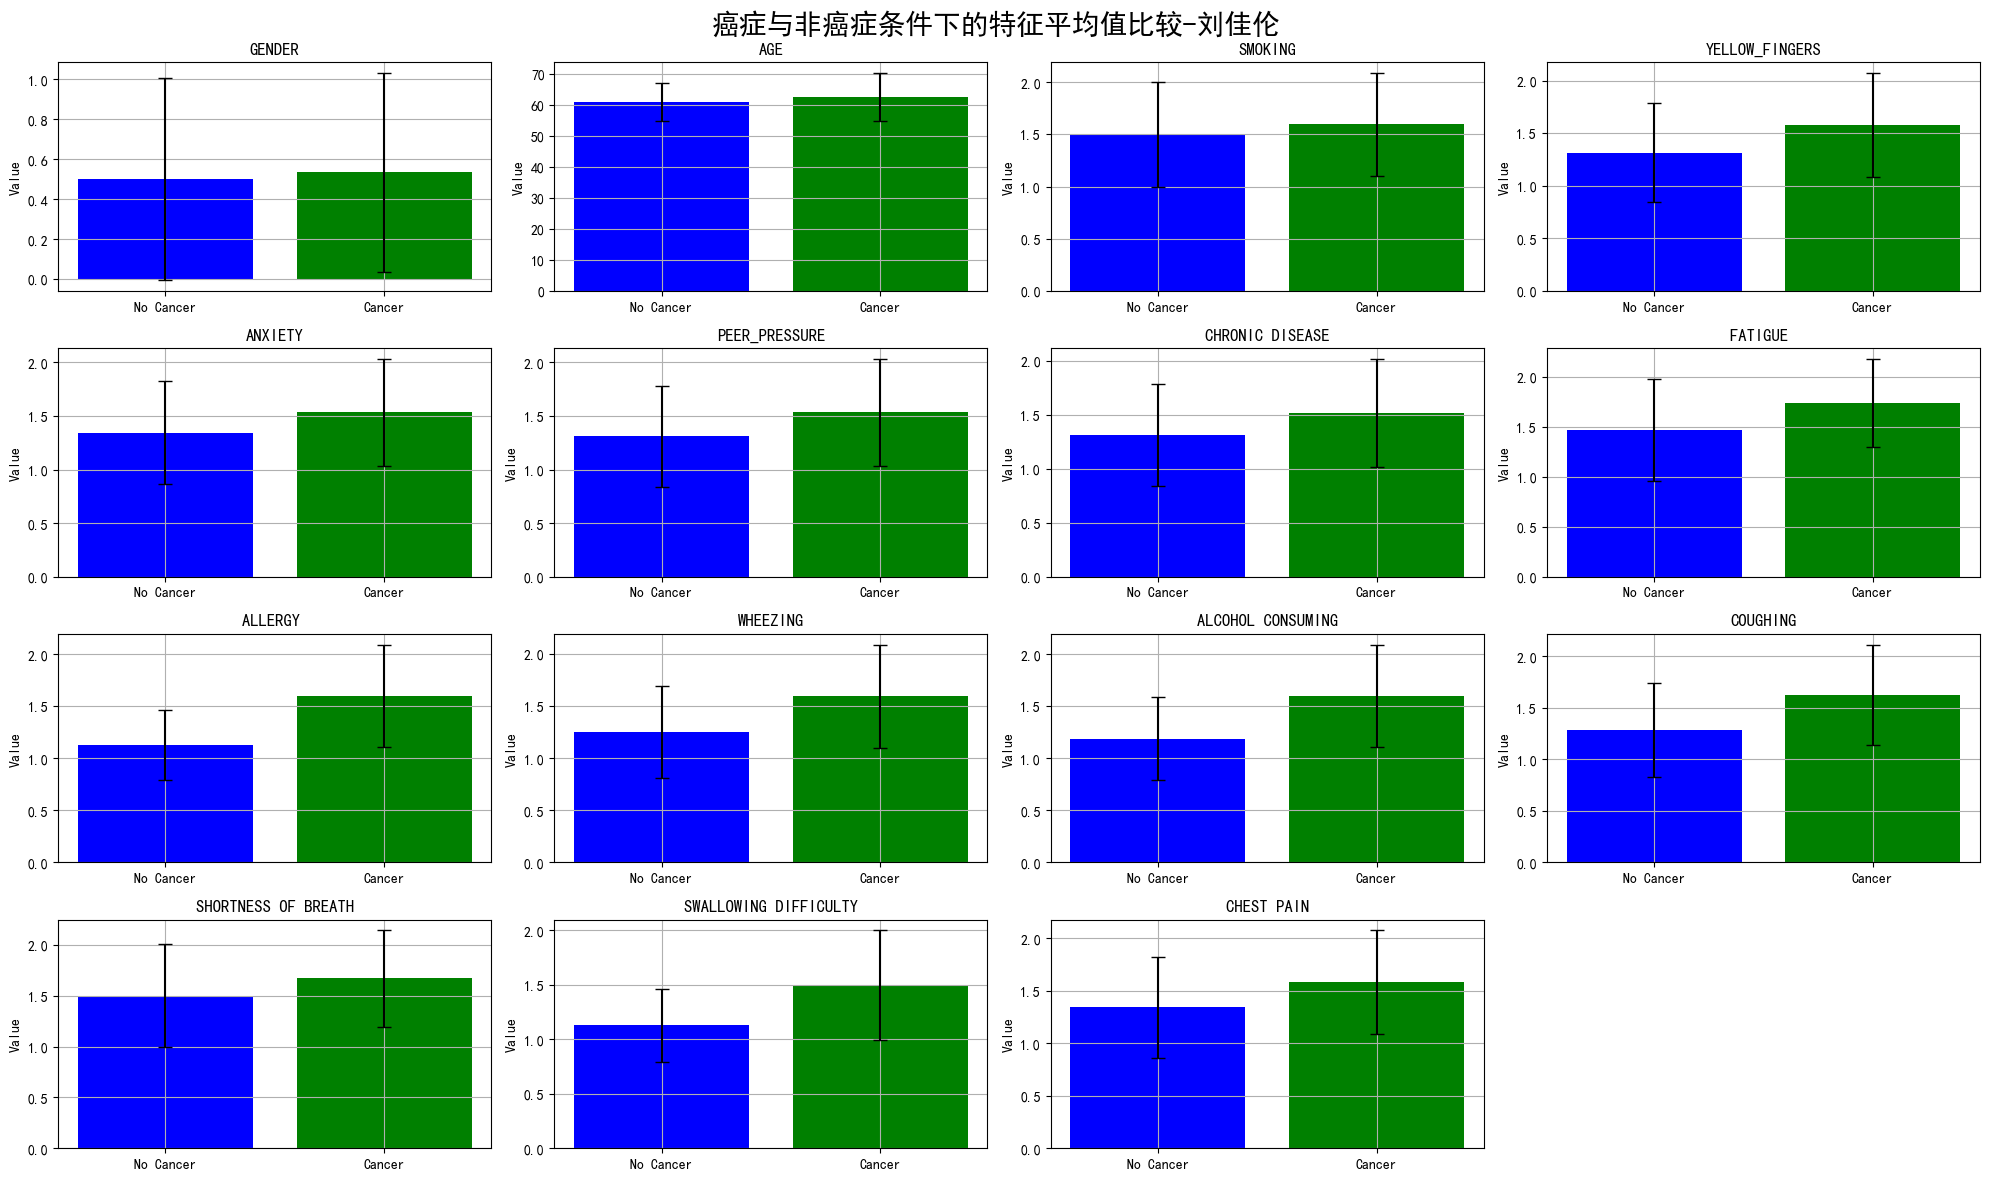

In [61]:
#使用条形图绘制条件概率统计的平均值，并使用误差条表示标准差
#创建一个新的matplotlib图形，用于绘制条形图，并设置图形的大小为20x12单位  
plt.figure(figsize=(20, 12))  

# 为整个图形设置一个大标题  
plt.suptitle('癌症与非癌症条件下的特征平均值比较-刘佳伦', fontsize=20) 

# 遍历prob_stats DataFrame中的每一行（即每个特征）  
# 使用iterrows()方法来迭代DataFrame，该方法返回索引和行数据  
for i, row in prob_stats.iterrows():  
    # 为每个特征创建一个子图，在4x4的网格布局中  
    # i + 1 是因为subplot的索引从1开始，而不是0  
    # 这里的i是当前迭代的行数（从0开始），因此i + 1将用作subplot的索引  
    plt.subplot(4, 4, i + 1)  
      
    # 准备要在条形图中展示的数据  
    # means列表包含'没有癌症'和'有癌症'两个类别下的平均值  
    means = [row['Mean in No Cancer'], row['Mean in Cancer']]  
    # errors列表包含'没有癌症'和'有癌症'两个类别下的标准差，用于绘制误差条  
    errors = [row['Std in No Cancer'], row['Std in Cancer']]  
      
    # 绘制条形图，其中'No Cancer'和'Cancer'是条形图的x轴标签  
    # means是条形的高度，yerr=errors表示误差条的高度（标准差）  
    # capsize=5设置误差条帽子的大小，color设置条形的颜色  
    plt.bar(['No Cancer', 'Cancer'], means, yerr=errors, capsize=5, color=['blue', 'green'])  
      
    # 设置当前子图的标题为当前特征的名称  
    plt.title(row['Feature'])  
      
    # 设置y轴的标签  
    plt.ylabel('Value')  
      
    # 显示网格线  
    plt.grid(True)  
  
# 调整子图之间的间距，使之更加紧凑，避免重叠  
plt.tight_layout()  
  
# 显示整个图形  
plt.show()

在癌症与非癌症条件下的特征平均值比较图中，可以直观地看出患癌和不患癌这两种情况在不同特征下的均值，根据误差棒的范围可知其在均值附近的偏差大小，误差棒范围越小，说明数据的分布集中在均值附近，反之误差棒的范围越大，数据的分布较为离散。

### 3.3 可视化每个特征在两个类别（无肺癌和有肺癌）中的分布情况
&emsp;&emsp;这里展示了使用小提琴图来可视化每个特征在两个类别（无肺癌和有肺癌）中的分布情况。小提琴图提供了关于数据分布和概率密度的详细信息，其中每个图表的宽度表示该区间内数据点的密集程度。
这些图表帮助我们理解不同类别在每个特征上的分布差异，是朴素贝叶斯分类器中条件概率计算的基础。

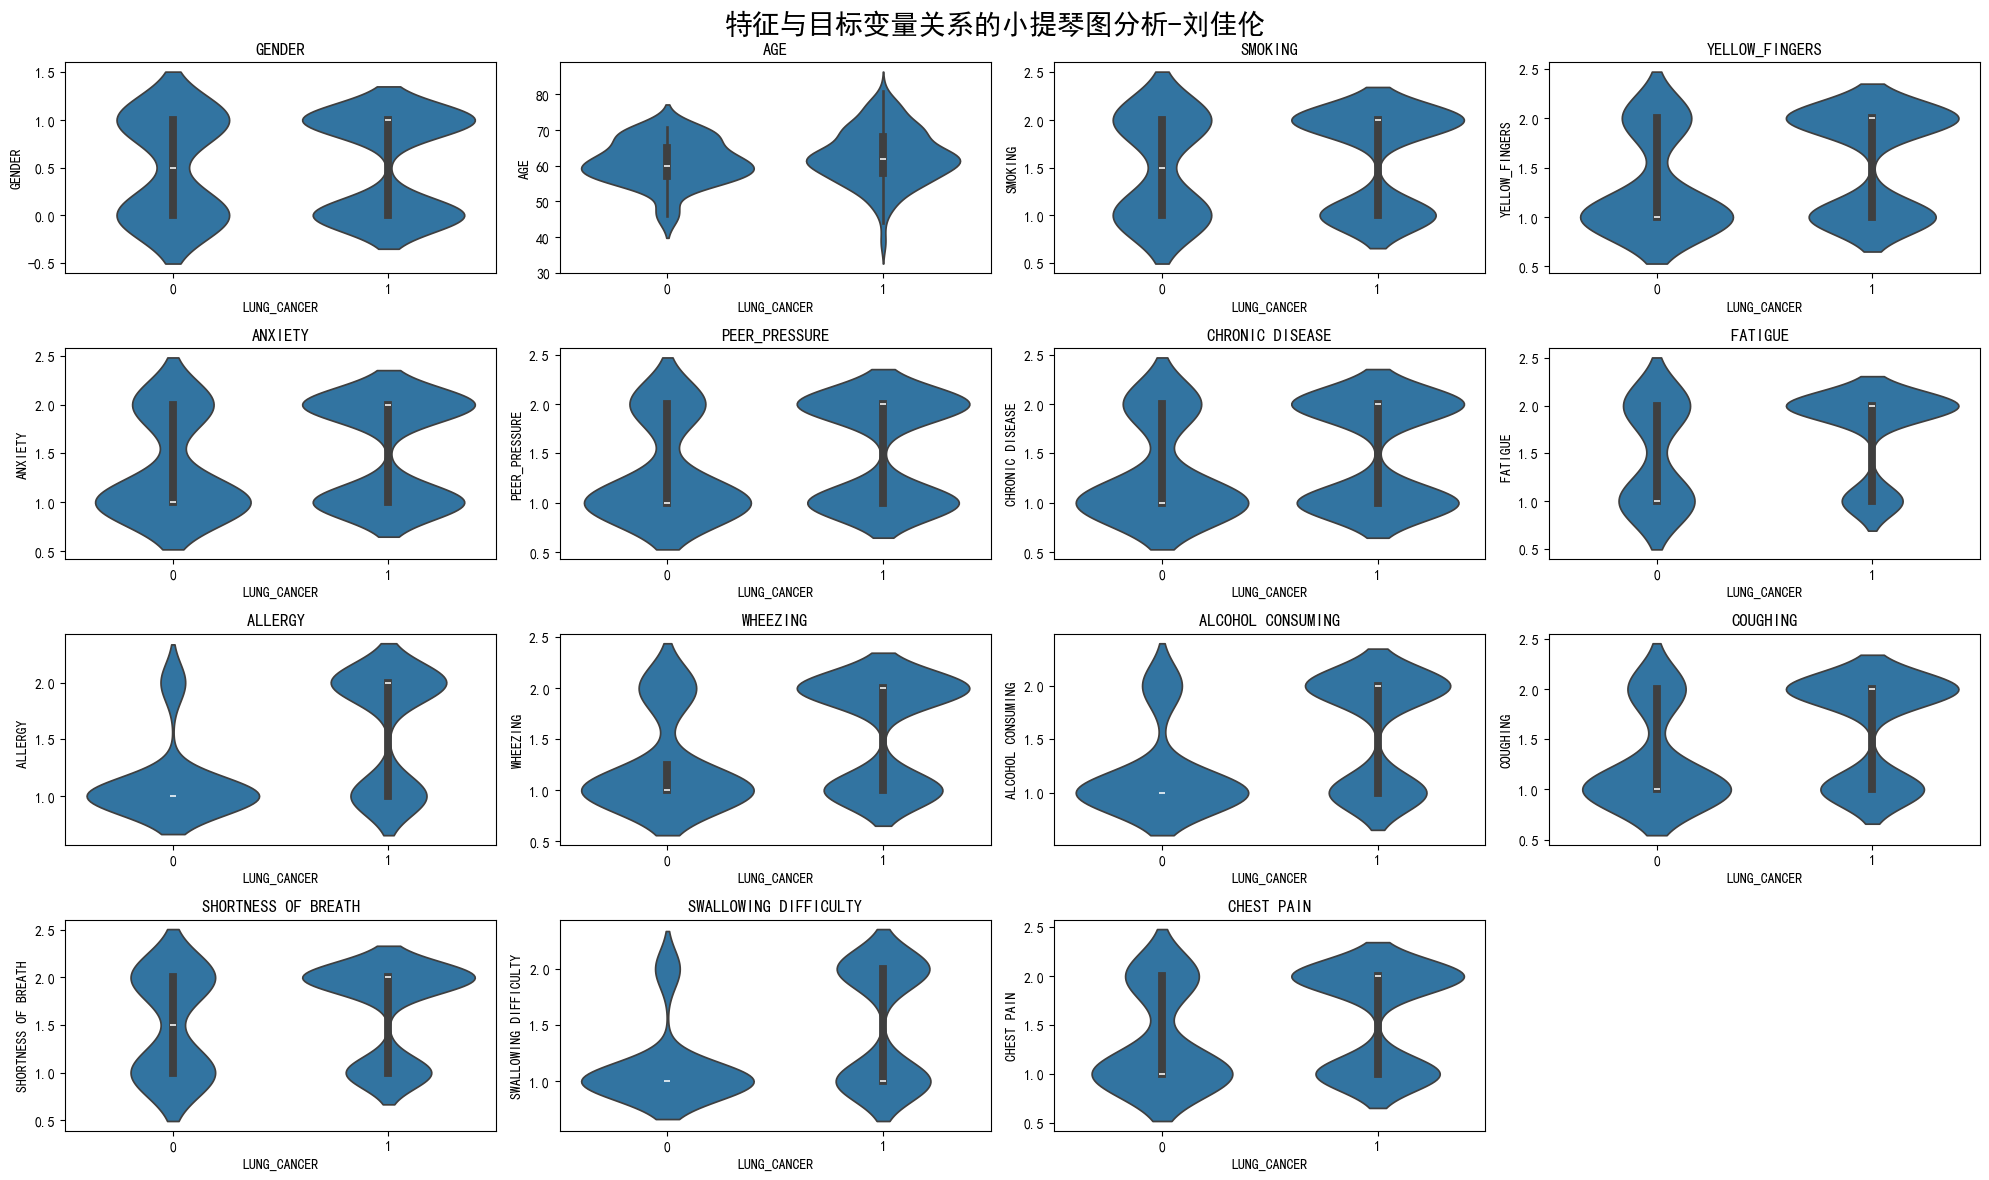

In [62]:
import seaborn as sns  
  
# 设置matplotlib的配置参数，以确保负号能够正常显示
plt.rcParams['axes.unicode_minus'] = False  
  
# 创建一个新的matplotlib图形，并设置其大小为20x12
plt.figure(figsize=(20, 12))  
  
# 遍历X_train中的每一个特征（列）  
# enumerate函数会同时返回特征的索引i和特征名feature  
for i, feature in enumerate(X_train.columns):  
    
    # 为每个特征创建一个小提琴图，并放置在4x4的网格布局中  
    # i + 1用于指定子图的位置，因为subplot的索引是从1开始的  
    plt.subplot(4, 4, i + 1)  
      
    # 使用seaborn的violinplot函数绘制小提琴图  
    # x轴表示类别（这里是y_train，即目标变量的值），y轴表示特征的值  
    sns.violinplot(x=y_train, y=X_train[feature])  
      
    # 设置当前子图的标题为当前特征的名称  
    plt.title(feature)  

# 设置一个大标题  
plt.suptitle('特征与目标变量关系的小提琴图分析-刘佳伦', fontsize=20)  # 设置大标题内容和字体大小

# 调整子图布局，确保所有子图之间有足够的空间，并且不会被裁剪或重叠  
plt.tight_layout()  
  
# 显示整个图形  
plt.show()

小提琴图的宽度表示数据的密度分布情况。密度高的区域会显示得更宽，从而可以清晰地看出数据在不同值上的聚集程度。 中间的黑色粗条表示四分位数范围，即数据的上下四分位数之间的区域，这有助于了解数据的集中趋势。 白点或其他标记通常表示中位数，即数据的中心点。

### 4 预测和模型评估

&emsp;&emsp;使用训练好的模型对训练集和测试集进行预测，包括绘制预测概率分布直方图，绘制准确率图表，计算训练集和测试集上的准确率以及F1分数，计算并获取ROC曲线和AUC值来评估模型性能。 

In [63]:
#使用朴素贝叶斯对训练数据和测试数据进行预测
y_train_pred_nb = nb_clf.predict(X_train)
y_test_pred_nb = nb_clf.predict(X_test)

#使用朴素贝叶斯模型预测训练数据和测试数据中为正类的概率
y_train_proba_nb = nb_clf.predict_proba(X_train)[:, 1]
y_test_proba_nb = nb_clf.predict_proba(X_test)[:, 1]

#计算朴素贝叶斯模型在训练集和测试集上的准确率
train_accuracy_nb = accuracy_score(y_train, y_train_pred_nb)
test_accuracy_nb = accuracy_score(y_test, y_test_pred_nb)

#ROC曲线和AUC在训练集和测试集上的应用
fpr_train_nb, tpr_train_nb, _ = roc_curve(y_train, y_train_proba_nb)# 计算训练集上的ROC曲线相关数据
auc_train_nb = auc(fpr_train_nb, tpr_train_nb)# 计算训练集上的AUC值
fpr_test_nb, tpr_test_nb, _ = roc_curve(y_test, y_test_proba_nb)# 计算测试集上的ROC曲线相关数据
auc_test_nb = auc(fpr_test_nb, tpr_test_nb)# 计算测试集上的AUC值

### 4.1 绘制预测概率分布直方图
&emsp;&emsp;这段代码使用matplotlib库在Python中绘制了朴素贝叶斯分类器对于“没有癌症”和“有癌症”两个类别的预测概率分布直方图。通过比较两个类别的预测概率分布，我们可以更深入地理解分类器如何区分这两个类别。

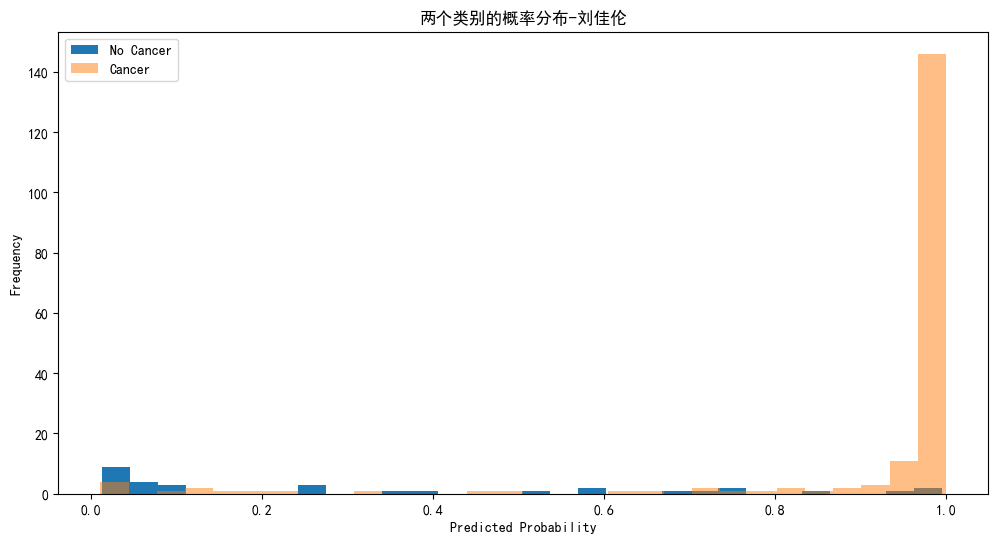

In [64]:
#为每个类别绘制概率分布
plt.figure(figsize=(12, 6))# 创建一个新的matplotlib图形，用于绘制概率分布，并设置图形大小为12x6单位

# 绘制'没有癌症'类别的预测概率直方图  
# 选择训练集中真实标签为'没有癌症'（即y_train == 0）的样本，提取它们的预测概率  
# 使用30个柱子（bins）来绘制直方图，设置透明度（alpha）为1.0，并标记为'No Cancer' 
plt.hist(y_train_proba_nb[y_train == 0], bins=30, alpha=1.0, label='No Cancer')

# 同样地，绘制'有癌症'类别的预测概率直方图
plt.hist(y_train_proba_nb[y_train == 1], bins=30, alpha=0.5, label='Cancer')

plt.xlabel('Predicted Probability')# 设置x轴标签为'预测概率'
plt.ylabel('Frequency')# 设置y轴标签为'频数'
plt.title('两个类别的概率分布-刘佳伦') # 设置图形的标题
plt.legend()# 显示图例，即上面设置的'No Cancer'和'Cancer'标签
plt.show()# 显示图形

代码分别绘制了“没有癌症”（y_train == 0）和“有癌症”（y_train == 1）两个类别的预测概率直方图。这两个直方图允许我们比较模型对于不同类别的预测概率分布。 对于“没有癌症”类别（标签为'No Cancer'），直方图使用完全不透明的颜色（alpha=1.0）绘制，这样可以清晰地看到该类别预测概率的分布情况。如果这个分布主要集中在低概率区域，那可能意味着模型对于判断为“没有癌症”的样本有较高的信心。 对于“有癌症”类别（标签为'Cancer'），直方图使用半透明的颜色（alpha=0.5）绘制，以便于与“没有癌症”类别的直方图进行对比。如果这个分布主要集中在高概率区域，表明模型对于判断为“有癌症”的样本预测也较为确定。 通过观察这个图形，我们可以分析模型对于不同类别的预测性能。两个类别的直方图并没有明显重叠的区域，这意味着模型对于类别的区分比较明确。

### 4.2 绘制准确率图表
&emsp;&emsp;使用matplotlib绘制一个条形图来展示训练集和测试集上的准确率。

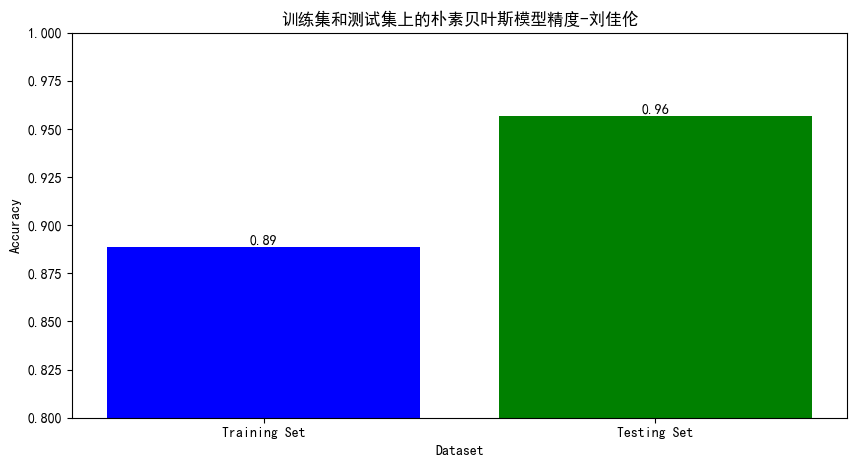

In [65]:
#绘制准确率图表
plt.rcParams['font.sans-serif'] = ['SimHei']# 设置matplotlib的字体为'SimHei'，以便正确显示中文
plt.figure(figsize=(10, 5))# 创建一个新的matplotlib图形，并设置其大小为10x5单位
bars=plt.bar(['Training Set', 'Testing Set'], [train_accuracy_nb, test_accuracy_nb], color=['blue', 'green'])# 绘制一个条形图，展示训练集和测试集上的准确率 

# 为每个条形图添加数值标签  
def add_labels(bars):  
    for bar in bars:  
        height = bar.get_height()  
        plt.text(bar.get_x() + bar.get_width() / 2, height,  
                 f'{height:.2f}',  # 保留两位小数  
                 ha='center', va='bottom', fontsize=10)  # 设置标签的水平对齐方式、垂直对齐方式和字体大小  
  
add_labels(bars)  

plt.xlabel('Dataset')# 设置x轴标签为'数据集' 
plt.ylabel('Accuracy') # 设置y轴标签为'准确率'
plt.title('训练集和测试集上的朴素贝叶斯模型精度-刘佳伦')#设置图形标题
plt.ylim([0.8, 1])# 设置y轴的范围为[0.8, 1]  
plt.show()#显示图形

模型在训练集上的准确率为0.89，在测试集上的准确率为0.96。这表明了模型在训练集和测试集上都有较好的表现，没有发生欠拟合和过拟合的现象，泛化能力较强。

### 4.3 计算并可视化F1分数等评估指标

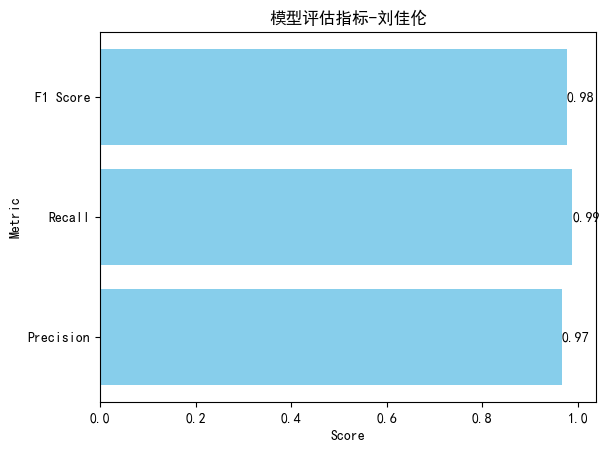

In [66]:
import matplotlib.pyplot as plt  
from sklearn.metrics import precision_score, recall_score, f1_score  
precision = precision_score(y_test, y_test_pred_nb)  #计算精度
recall = recall_score(y_test,y_test_pred_nb)  #计算召回率
f1 = f1_score(y_test, y_test_pred_nb)  #计算F1分数
labels = ['Precision', 'Recall', 'F1 Score']  
values = [precision, recall, f1]  
  
fig, ax = plt.subplots()  
  
# 创建条形图  
ax.barh(labels, values, color='skyblue')  
  
# 设置图表标题和坐标轴标签  
ax.set_title('模型评估指标-刘佳伦')  
ax.set_xlabel('Score')  
ax.set_ylabel('Metric')  
  
# 显示每个条形图上的数值标签  
for index, value in enumerate(values):  
    plt.text(value, index, str(round(value, 2)), va='center')  
  
# 显示图表  
plt.show()

 F1分数是精确率和召回率的调和平均值，用于综合评估分类器的性能，特别是在类别不平衡的情况下。在某些情况下，精确率和召回率之间存在权衡。F1分数帮助找到一个平衡点，使分类器在精确率和召回率之间取得良好的性能。F1分数在处理不平衡类别的情况下特别有用，因为它同时考虑了假正例和假负例，而不仅仅是准确性。
  如图所示的计算F1分数结果为0.98，表明分类器在精确率和召回率之间取得了极高的平衡，显示出优异的性能。这意味着分类器能够准确地识别出大部分真正的正例，并且误报率较低。高F1分数意味着模型的预测结果具有较高的可靠性。在实际应用中，这可以为用户提供更准确的预测和决策支持。
  尽管F1分数为0.98已经很高，但仍有提升空间。为了进一步提高性能，可以尝试优化模型的参数、改进特征选择或尝试其他更先进的算法。

### 4.4 绘制ROC曲线
&emsp;&emsp;以下代码片段展示了如何使用matplotlib库在Python中绘制朴素贝叶斯分类器的ROC（Receiver Operating Characteristic）曲线。ROC曲线是评估二元分类器性能的一种常用工具，通过绘制真正率（True Positive Rate, TPR）与假正率（False Positive Rate, FPR）之间的关系来展示分类器的性能。

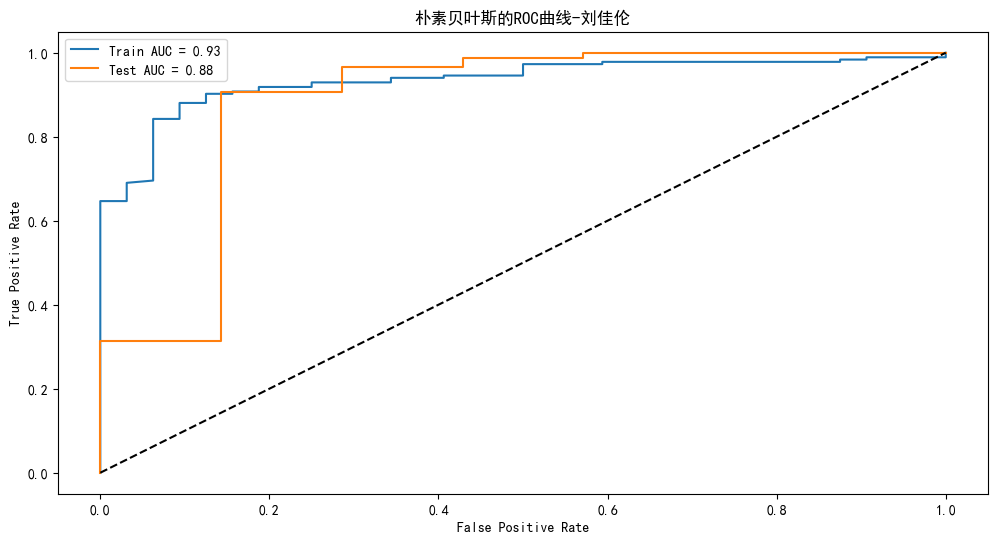

In [67]:
#绘制ROC曲线
plt.figure(figsize=(12, 6)) # 创建一个新的matplotlib图形，并设置其大小为12x6单位 

# 绘制训练集的ROC曲线，其中fpr_train_nb和tpr_train_nb分别是训练集上的假正率和真正率  
# 同时，在图上显示训练集的AUC（Area Under the Curve，曲线下面积）值，保留两位小数  
# label参数用于设置图例中的标签  
plt.plot(fpr_train_nb, tpr_train_nb, label=f'Train AUC = {auc_train_nb:.2f}')

# 绘制测试集的ROC曲线，其中fpr_test_nb和tpr_test_nb分别是测试集上的假正率和真正率  
# 同时，在图上显示测试集的AUC值，保留两位小数  
plt.plot(fpr_test_nb, tpr_test_nb, label=f'Test AUC = {auc_test_nb:.2f}')

plt.plot([0, 1], [0, 1], 'k--')# 绘制一条从(0,0)到(1,1)的对角线，表示一个无信息的分类器（即随机猜测）的性能 
plt.xlabel('False Positive Rate')# 设置x轴的标签为'False Positive Rate'（假正率）
plt.ylabel('True Positive Rate')# 设置y轴的标签为'True Positive Rate'（真正率）  
plt.title('朴素贝叶斯的ROC曲线-刘佳伦') # 设置图形的标题
plt.legend()# 显示图例，其中包含了训练集和测试集的AUC值 
plt.show()#显示图形

ROC曲线解释：ROC曲线通过展示真正率和假正率之间的关系来评估分类器的性能。理想情况下，分类器的ROC曲线应该尽可能接近左上角（TPR=1, FPR=0），这意味着分类器能够完美地识别出所有正样本，并且不会错误地将任何负样本识别为正样本。
  AUC值：AUC（Area Under the Curve）是ROC曲线下的面积，用于量化分类器的性能。AUC值越大，分类器的性能越好。AUC值为1表示分类器是完美的，而AUC值为0.5表示分类器的性能与随机猜测相当。
  对角线基准：ROC曲线图中绘制了对角线，表示一个随机猜测分类器的性能。如果分类器的ROC曲线在这条对角线下方，那么它的性能甚至还不如随机猜测。
  训练集与测试集对比：通过比较训练集和测试集上的ROC曲线和AUC值，可以评估分类器在未见过的数据上的泛化能力。如果训练集和测试集的AUC值相差较大，这可能表明分类器存在过拟合问题。
  性能评估：通过观察ROC曲线和AUC值，我们可以直观地了解朴素贝叶斯分类器在给定数据集上的性能。图中ROC曲线均在对角线上方靠近左上角，AUC值为0.93和0.88均接近1，说明分类器性能良好；如果AUC值接近0.5，则可能需要考虑其他分类器或改进当前分类器的特征选择、参数调整等方面。

## 6.随机森林
2022218523-黄锦涛

### 1.1下载数据集,显示数据集的前几行及其摘要

In [68]:
import pandas as pd
lung_cancer_data = pd.read_csv('survey lung cancer.csv')

In [69]:
# Display the first few rows of the dataset and its summary
lung_cancer_data.head(), lung_cancer_data.info(), lung_cancer_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

(  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
 0      M   69        1               2        2              1   
 1      M   74        2               1        1              1   
 2      F   59        1               1        1              2   
 3      M   63        2               2        2              1   
 4      F   63        1               2        1              1   
 
    CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
 0                1         2         1         2                  2         2   
 1                2         2         2         1                  1         1   
 2                1         2         1         2                  1         2   
 3                1         1         1         1                  2         1   
 4                1         1         1         2                  1         2   
 
    SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
 0                    2      

### 1.2数据集中的分类变量进行了编码处理

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Encode categorical variables
le_gender = LabelEncoder()  # 创建标签编码器
le_cancer = LabelEncoder()
lung_cancer_data['GENDER'] = le_gender.fit_transform(lung_cancer_data['GENDER'])  # 对'GENDER'列进行编码
lung_cancer_data['LUNG_CANCER'] = le_cancer.fit_transform(lung_cancer_data['LUNG_CANCER'])  # 对'LUNG_CANCER'列进行编码

### 1.3定义特征变量和目标变量

In [71]:
X = lung_cancer_data.drop('LUNG_CANCER', axis=1)  # 定义特征变量
y = lung_cancer_data['LUNG_CANCER']  # 定义目标变量

### 二、数据划分：我们将数据集划分为训练集和测试集

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 将数据集分为训练集和测试集

### 三、模型训练

In [73]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the random forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)  # 创建随机森林分类器
rf_clf.fit(X_train, y_train)  # 使用训练数据训练模型

RandomForestClassifier(random_state=42)

### 四、模型预测

In [74]:
# Predict on training and testing data
y_train_pred_rf = rf_clf.predict(X_train)  # 对训练数据进行预测
y_test_pred_rf = rf_clf.predict(X_test)  # 对测试数据进行预测

### 五、模型评估

### 5.1计算模型在训练集和测试集上的准确率，绘制精度模型

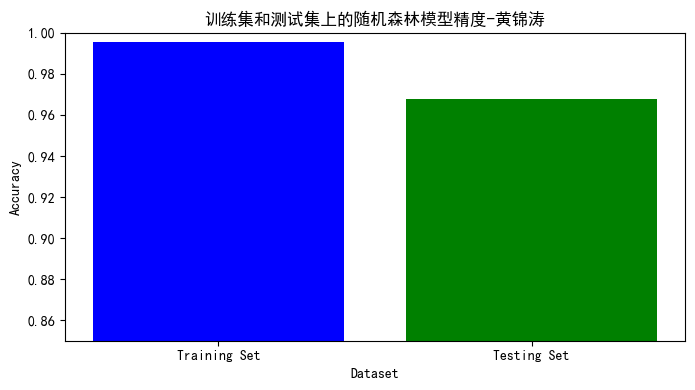

In [75]:
# Calculate accuracy for random forest
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)  # 计算训练集的准确率
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)  # 计算测试集的准确率

# Plotting accuracy
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.figure(figsize=(8, 4))  # 创建一个新的图形，设置其大小为8x4
plt.bar(['Training Set', 'Testing Set'], [train_accuracy_rf, test_accuracy_rf], color=['blue', 'green'])  # 创建一个条形图，显示训练集和测试集的准确率
plt.xlabel('Dataset')  # 设置x轴的标签为'Dataset'
plt.ylabel('Accuracy')  # 设置y轴的标签为'Accuracy'
plt.title('训练集和测试集上的随机森林模型精度-黄锦涛')  # 设置图形的标题
plt.ylim([0.85, 1])  # 设置y轴的范围为0.85到1
plt.show()  # 显示图形

### 
我们的模型在训练集和测试集上的准确率都相当高，这表明模型具有良好的预测能力。
这个图形显示了训练集和测试集上的随机森林模型的精度。
从图中可以看出，无论是在训练集还是在测试集上，模型的精度都接近1.00，这表明模型的预测性能非常好。

### 5.2提取了模型中每个特征的重要性，并通过条形图进行了可视化

In [76]:
# Extract feature importances
feature_importances_rf = rf_clf.feature_importances_  # 提取特征的重要性

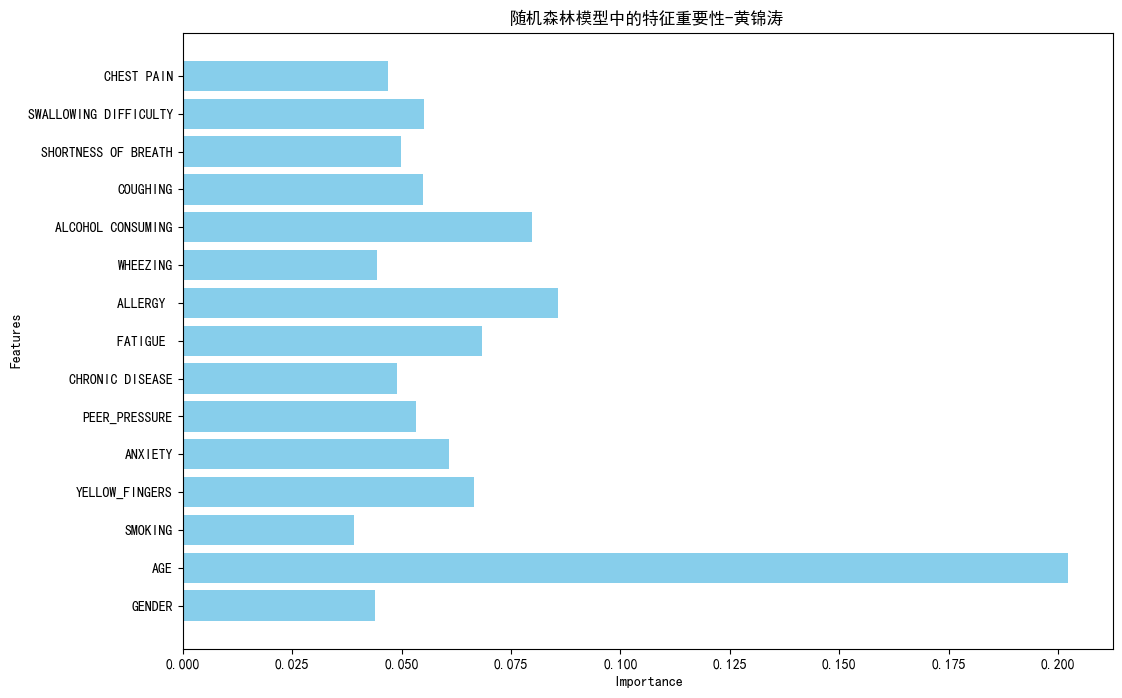

In [77]:
# 创建一个新的图形，设置大小为12x8
plt.figure(figsize=(12, 8))

# 创建一个水平条形图，条形的长度由特征的重要性决定
# X.columns 是特征的名称，feature_importances_rf 是随机森林模型中每个特征的重要性
plt.barh(X.columns, feature_importances_rf, color='skyblue')

# 设置x轴的标签为 'Importance'
plt.xlabel('Importance')

# 设置y轴的标签为 'Features'
plt.ylabel('Features')

# 设置图形的标题为 '随机森林模型中的特征重要性-黄锦涛'
plt.title('随机森林模型中的特征重要性-黄锦涛')

# 显示图形
plt.show()

### 
这个图形显示了随机森林模型中各个特征的重要性。
从图中可以看出，‘AGE’（年龄）的重要性最高，其次是’ALLERY’（过敏），‘SMOKING’（吸烟）等其他特征的重要性相对较低。
在这个项目中年龄被认为是最重要的特征，这可能说明性别在肺癌的发生中起着重要的作用

### 可视化混淆矩阵

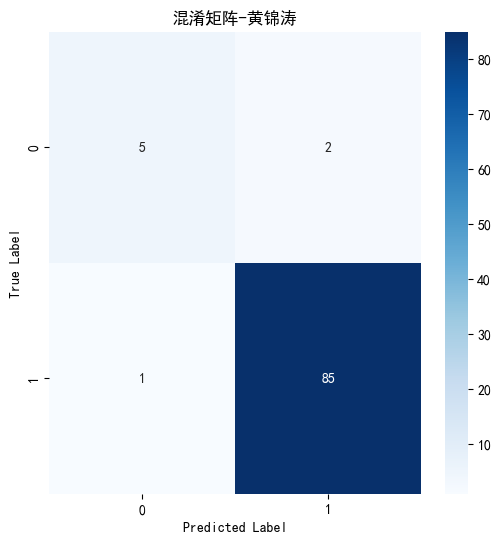

In [78]:
# 导入所需的库和函数
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
import seaborn as sns

# 使用随机森林分类器预测测试数据的概率，取第二列（即正类的概率）
y_test_probs_rf = rf_clf.predict_proba(X_test)[:, 1]

# 生成混淆矩阵
cm = confusion_matrix(y_test, y_test_pred_rf)

# 创建一个新的图形，设置大小为6x6
plt.figure(figsize=(6, 6))

# 使用seaborn库的heatmap函数绘制混淆矩阵的热力图
# annot=True表示在每个单元格中添加注释，fmt='d'表示将数字格式化为整数，cmap='Blues'表示使用蓝色调的颜色映射
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# 设置图形的标题为 '混淆矩阵-黄锦涛'
plt.title('混淆矩阵-黄锦涛')

# 设置x轴的标签为 'Predicted Label'
plt.xlabel('Predicted Label')

# 设置y轴的标签为 'True Label'
plt.ylabel('True Label')

# 显示图形
plt.show()

### 5.4计算真正率和假正率，并绘制了ROC曲线

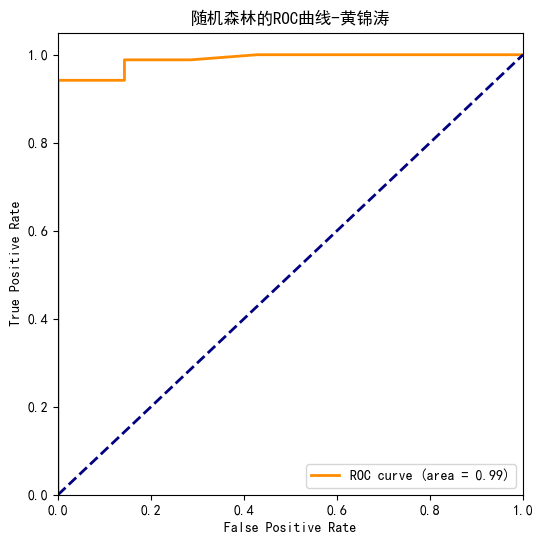

In [79]:
# 使用roc_curve函数计算真正率（True Positive Rate）和假正率（False Positive Rate）
fpr, tpr, _ = roc_curve(y_test, y_test_probs_rf)

# 计算ROC曲线下的面积（AUC）
roc_auc = auc(fpr, tpr)

# 创建一个新的图形，设置大小为6x6
plt.figure(figsize=(6, 6))

# 绘制ROC曲线，颜色为深橙色，线宽为2
# 并添加标签，显示ROC曲线下的面积（AUC）
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

# 绘制对角线，颜色为海军蓝，线宽为2，线型为虚线
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# 设置x轴的范围为[0.0, 1.0]
plt.xlim([0.0, 1.0])

# 设置y轴的范围为[0.0, 1.05]
plt.ylim([0.0, 1.05])

# 设置x轴的标签为 'False Positive Rate'
plt.xlabel('False Positive Rate')

# 设置y轴的标签为 'True Positive Rate'
plt.ylabel('True Positive Rate')

# 设置图形的标题为 '随机森林的ROC曲线-黄锦涛'
plt.title('随机森林的ROC曲线-黄锦涛')

# 添加图例，位置在右下角
plt.legend(loc="lower right")

# 显示图形
plt.show()

### 
图中的曲线接近左上角，表示真阳性率高，假阳性率低，这表明模型性能良好。 
图中还有一个注解，写着 “ROC curve (area = 0.99)”，意味着这个ROC曲线下的面积是0.99，非常接近1， 表明预测模型非常优秀。
虚线代表从图的左下角到右上角的对角线，这代表随机猜测。
实线明显高于这条虚线，表明模型的性能远胜于随机猜测。

## 7.决策树
2022216315-程唐琛

一、引入必要的软件包并加载数据，检查它的结构，然后进行必要的数据预处理步骤。

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

1.获取、加载数据集和数据处理

数据集来自该链接：https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer

In [81]:
lung_cancer_data = pd.read_csv('survey lung cancer.csv')

2.显示数据集的前几行及其摘要

In [82]:
lung_cancer_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [83]:
lung_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [84]:
lung_cancer_data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


数据集包括309条记录，每条记录有16个特征。这些特征包括：

GENDER - 性别（字符型） AGE - 年龄（整数型） SMOKING - 吸烟（二进制，1或2） YELLOW_FINGERS - 黄手指（二进制，1或2） ANXIETY - 焦虑（二进制，1或2） PEER_PRESSURE - 同辈压力（二进制，1或2） CHRONIC DISEASE - 慢性病（二进制，1或2） FATIGUE - 疲劳（二进制，1或2） ALLERGY - 过敏（二进制，1或2） WHEEZING - 哮喘（二进制，1或2） ALCOHOL CONSUMING - 饮酒（二进制，1或2） COUGHING - 咳嗽（二进制，1或2） SHORTNESS OF BREATH - 呼吸急促（二进制，1或2） SWALLOWING DIFFICULTY - 吞咽困难（二进制，1或2） CHEST PAIN - 胸痛（二进制，1或2） LUNG_CANCER - 肺癌（字符型，'YES' 或 'NO'）


### 二、将处理数据集中的分类变量，将其转换为适合模型训练的格式，并对数据集分为训练集和测试集，然后训练决策树模型并进行可视化。

1.将变量进行分类编码

In [85]:
le_gender = LabelEncoder()
le_cancer = LabelEncoder()
lung_cancer_data['GENDER'] = le_gender.fit_transform(lung_cancer_data['GENDER'])
lung_cancer_data['LUNG_CANCER'] = le_cancer.fit_transform(lung_cancer_data['LUNG_CANCER'])

2.定义特征变量和目标变量

In [86]:
X = lung_cancer_data.drop('LUNG_CANCER', axis=1)
y = lung_cancer_data['LUNG_CANCER']

3.将数据集分割为训练集和测试集

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

4.创建并训练决策树分类器

In [88]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

5.可视化决策树

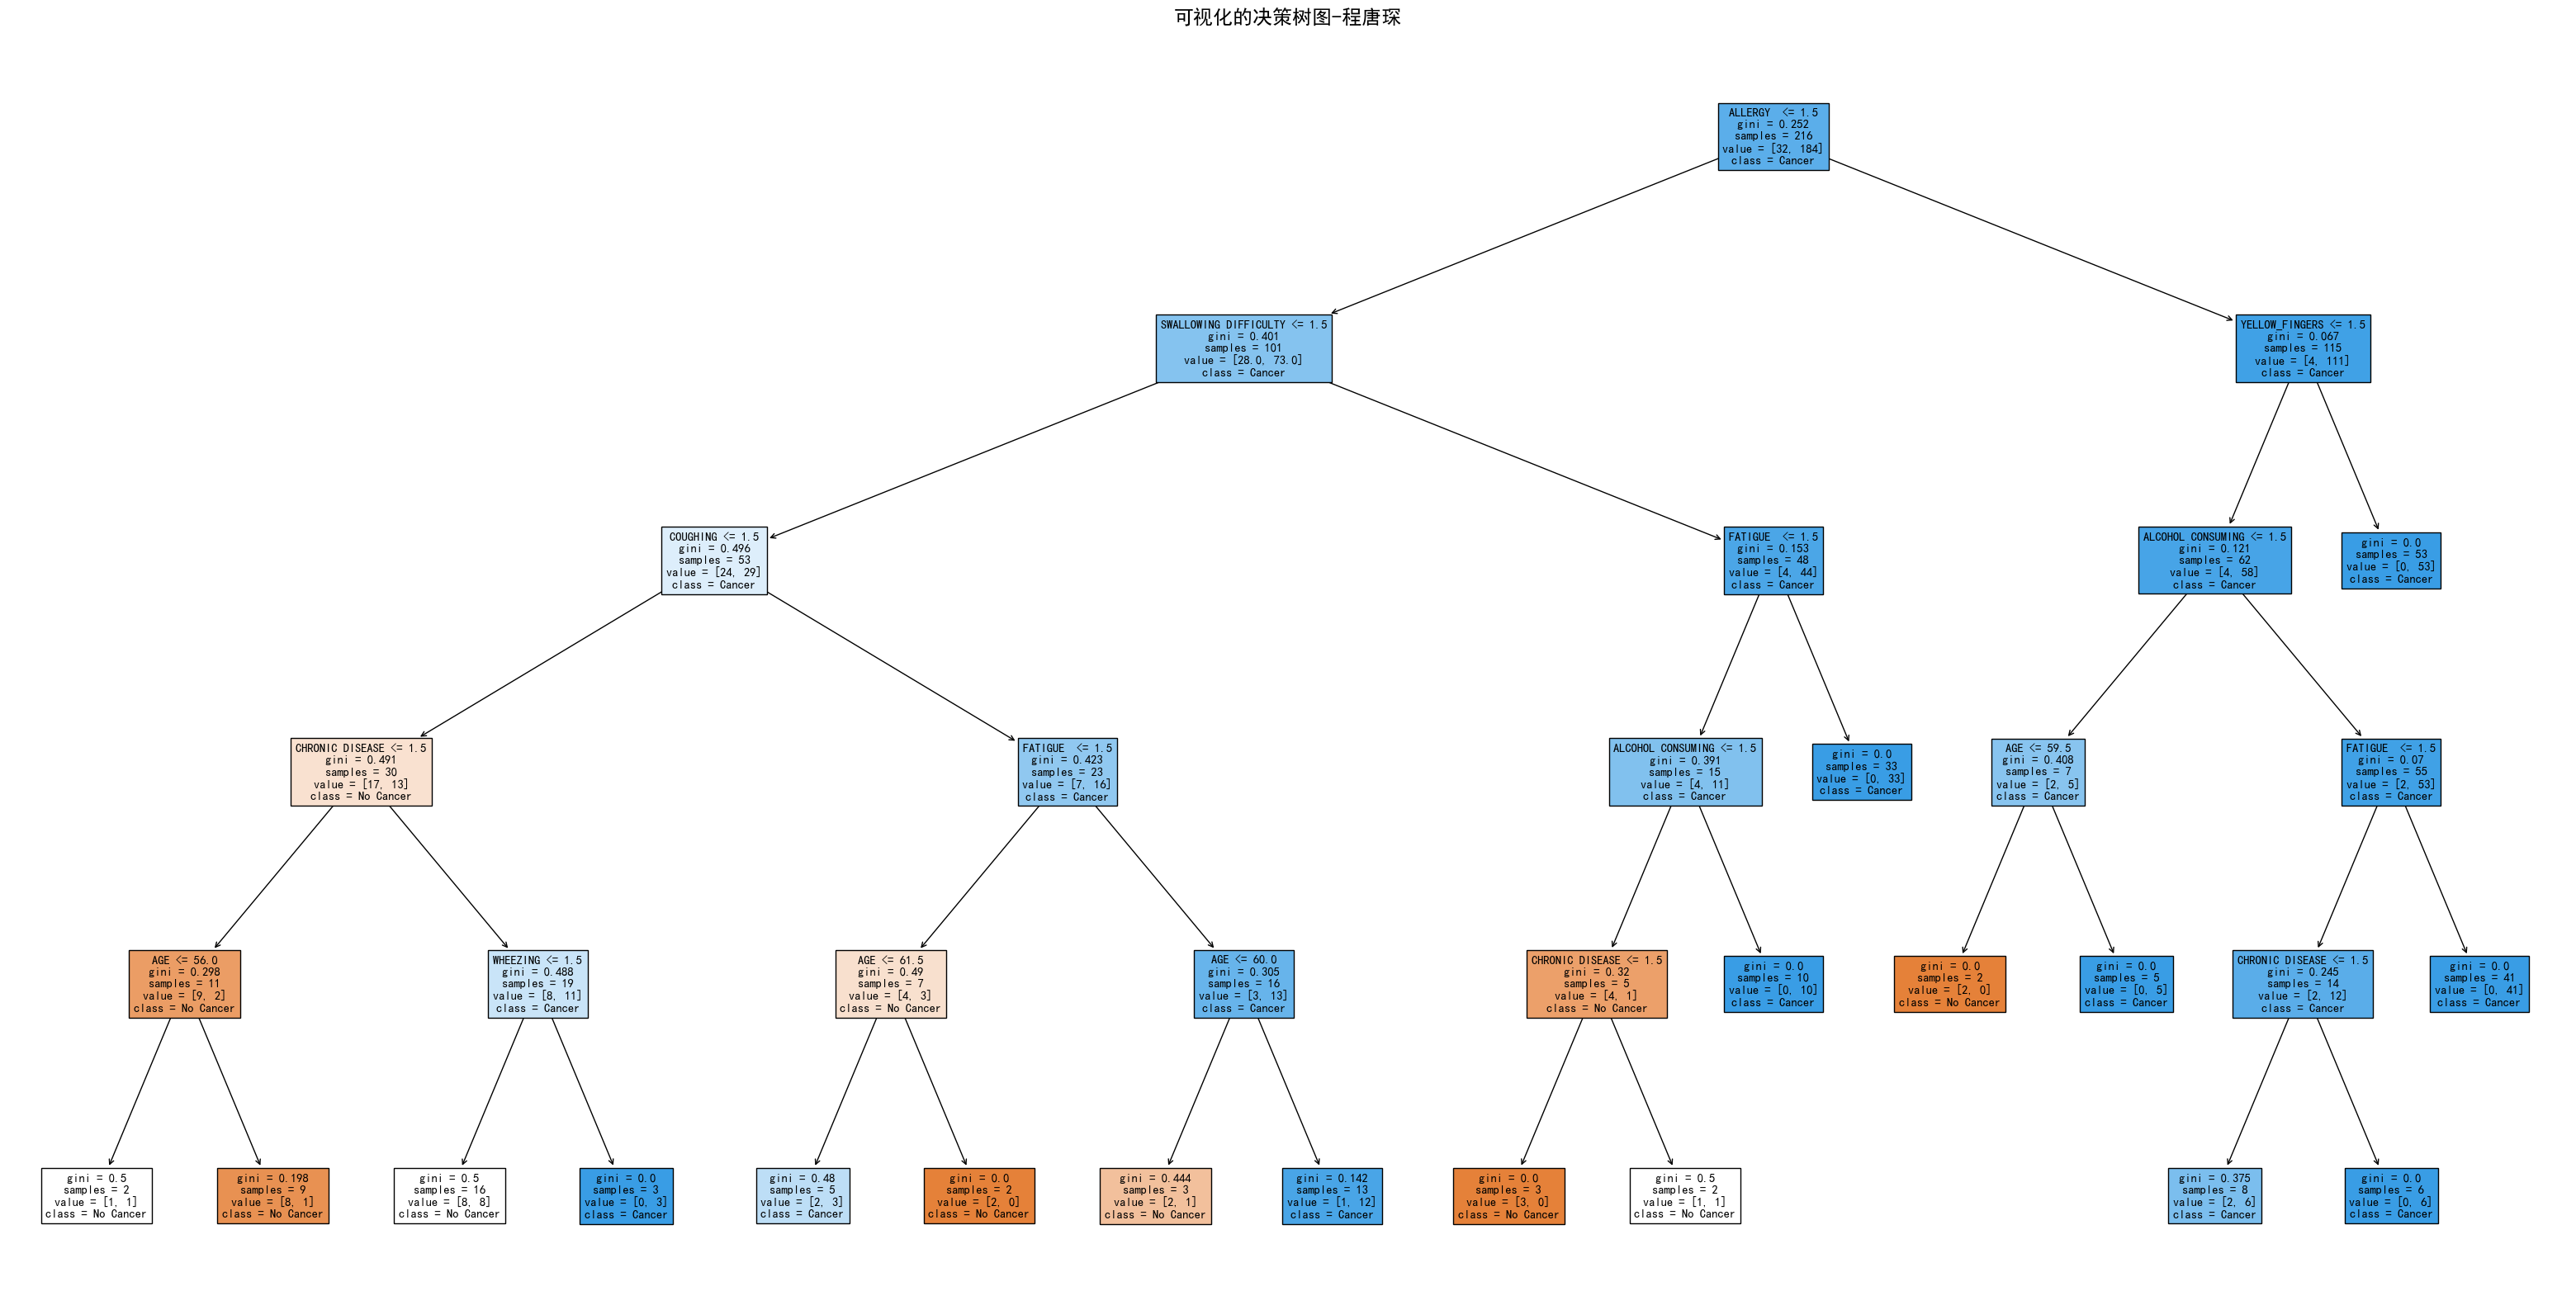

In [89]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.figure(figsize=(40,20))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Cancer', 'Cancer'])
plt.title('可视化的决策树图-程唐琛',fontsize='xx-large')
plt.show()

这是训练出的决策树模型的可视化图。
在这个决策树中，每个节点表示一个决策点，根据特定特征的值将数据分为两部分。 
树的叶节点代表最终的分类结果，即肺癌的患病与否（标记为 'No Cancer' 和 'Cancer'）

6.在训练数据和测试数据上进行预测

In [90]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

7.计算准确率

In [91]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [92]:
print(train_accuracy, test_accuracy)

0.9212962962962963 0.9247311827956989


决策树模型在训练集上的准确率为92.13%，在测试集上的准确率为92.47%。
这表明模型在训练集和测试集上都有很好的表现，并且泛化能力较强。

8.生成一个准确率条形图

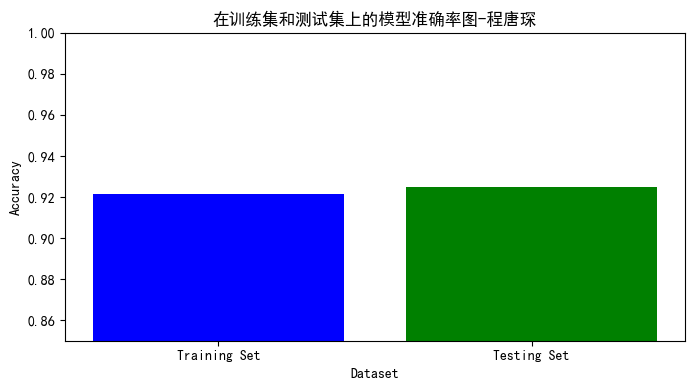

In [93]:
labels = ['Training Set', 'Testing Set']
accuracies = [train_accuracy, test_accuracy]
plt.figure(figsize=(8, 4))
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('在训练集和测试集上的模型准确率图-程唐琛')
plt.ylim([0.85, 1])
plt.show()

这是模型在训练集和测试集上的准确率可视化图表。 
蓝色条形代表训练集准确率，绿色条形代表测试集准确率。 
从图中可以看出，两者的准确率非常接近，说明模型具有较好的泛化能力。

9.从模型中提取特征重要性

In [94]:
feature_importances = clf.feature_importances_

10.绘制各特征的重要性图

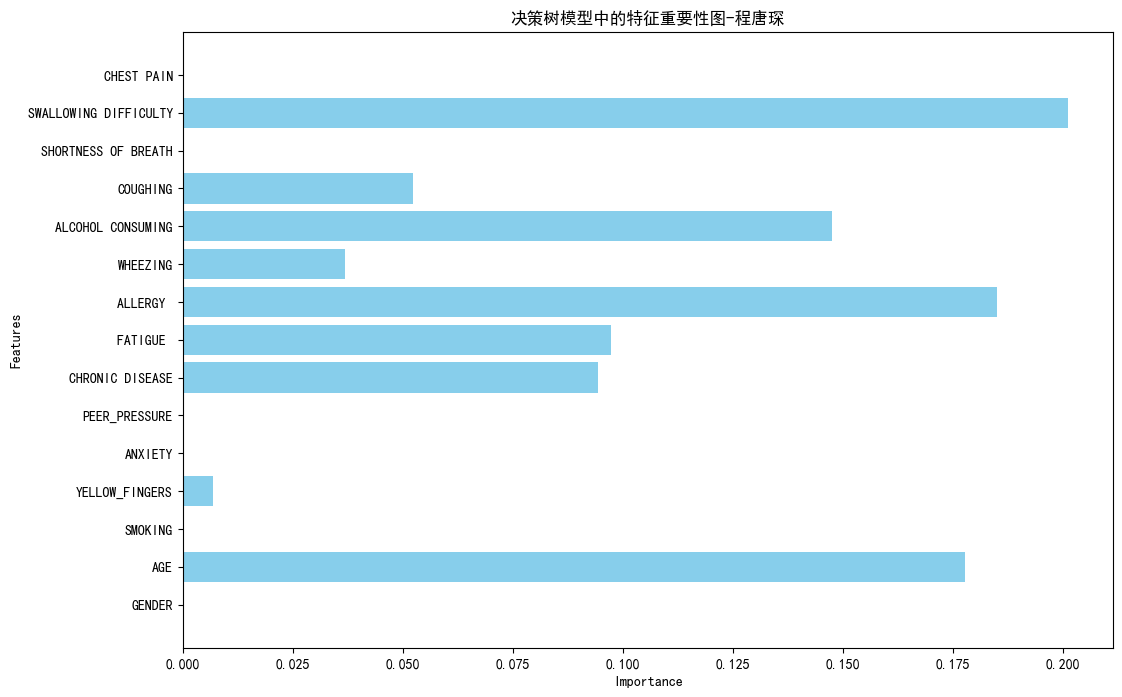

In [95]:
plt.figure(figsize=(12, 8))
plt.barh(X.columns, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('决策树模型中的特征重要性图-程唐琛')
plt.show()

这是决策树模型中各特征的重要性图。图中显示了每个特征对模型预测肺癌患病与否的贡献程度。
特征重要性越高，该特征在模型中的决策过程中起到的作用越大。

## 8.KNN
2022216743-林钰鑫

### 获取数据和数据处理
数据集来自该链接：https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer

### 加载数据集并显示其信息

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
from sklearn.model_selection import learning_curve

lung_cancer_data = pd.read_csv('survey lung cancer.csv')
lung_cancer_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [97]:
lung_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [98]:
 lung_cancer_data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


数据集包括309条记录，每条记录有16个特征。这些特征包括： GENDER - 性别（字符型） AGE - 年龄（整数型） SMOKING - 吸烟（二进制，1或2） YELLOW_FINGERS - 黄手指（二进制，1或2） ANXIETY - 焦虑（二进制，1或2） PEER_PRESSURE - 同辈压力（二进制，1或2） CHRONIC DISEASE - 慢性病（二进制，1或2） FATIGUE - 疲劳（二进制，1或2） ALLERGY - 过敏（二进制，1或2） WHEEZING - 哮喘（二进制，1或2） ALCOHOL CONSUMING - 饮酒（二进制，1或2） COUGHING - 咳嗽（二进制，1或2） SHORTNESS OF BREATH - 呼吸急促（二进制，1或2） SWALLOWING DIFFICULTY - 吞咽困难（二进制，1或2） CHEST PAIN - 胸痛（二进制，1或2） LUNG_CANCER - 肺癌（字符型，'YES' 或 'NO'）

### 对分类变量进行编码

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, auc
le_gender = LabelEncoder()
le_cancer = LabelEncoder()
lung_cancer_data['GENDER'] = le_gender.fit_transform(lung_cancer_data['GENDER'])
lung_cancer_data['LUNG_CANCER'] = le_cancer.fit_transform(lung_cancer_data['LUNG_CANCER'])

该段代码使用LabelEncoder对lung_cancer_data数据集中的’GENDER’和’LUNG_CANCER’两列进行编码，将其转换为数值型数据。 LabelEncoder是scikit-learn库中的一个工具，用于将字符串标签编码为整数标签。(即将yes和no转化为1和0)

### 定义特征和目标变量

In [100]:
X = lung_cancer_data.drop('LUNG_CANCER', axis=1)
y = lung_cancer_data['LUNG_CANCER']

X = lung_cancer_data.drop(‘LUNG_CANCER’, axis=1) 这行代码的意思是从lung_cancer_data 中删除 ‘LUNG_CANCER’ 列，并将结果保存到 X 变量中。 即将‘LUNG_CANCER’之外的所有其他特征均保存到X中。而y = lung_cancer_data[‘LUNG_CANCER’] 这行代码将 ‘LUNG_CANCER’ 列提取出来，保存到 y 变量 中。


### 将数据集分割为训练集和测试集

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 训练KNN模型

In [102]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

在这里，我们使用scikit-learn库中的KNeighborsClassifier创建了一个k近邻分类器对象。参数n_neighbors=5指定了使用的邻居数量为5。 然后，使用fit()方法将训练数据集X_train和对应的标签y_train传递给分类器对象，以便训练模型。

### 使用KNN对训练和测试数据进行预测

In [103]:
y_train_pred_knn = knn_clf.predict(X_train)
y_test_pred_knn = knn_clf.predict(X_test)

在这里，predict()方法用于对输入数据进行预测，并返回预测结果。预测结果分别存储在y_train_pred_knn和y_test_pred_knn中。

### KNN预测概率

In [104]:
y_train_proba_knn = knn_clf.predict_proba(X_train)[:, 1]
y_test_proba_knn = knn_clf.predict_proba(X_test)[:, 1]

### 计算KNN的准确率

In [105]:
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
fpr_train_knn, tpr_train_knn, _ = roc_curve(y_train, y_train_proba_knn)
auc_train_knn = auc(fpr_train_knn, tpr_train_knn)
fpr_test_knn, tpr_test_knn, _ = roc_curve(y_test, y_test_proba_knn)
auc_test_knn = auc(fpr_test_knn, tpr_test_knn)

这里使用到了accuracy_score函数来比较真实标签（y_train和y_test）与对应的预测标签（y_train_pred_knn和y_test_pred_knn）， 然后将结果存储在train_accuracy_knn和test_accuracy_knn中。 后续使用 roc_curve 函数计算了在训练集和测试集上的真正率（TPR）和假正率（FPR），然后通过 auc 函数计算了每个数据集上的ROC曲线下的面积（AUC）。

### 绘制条形图

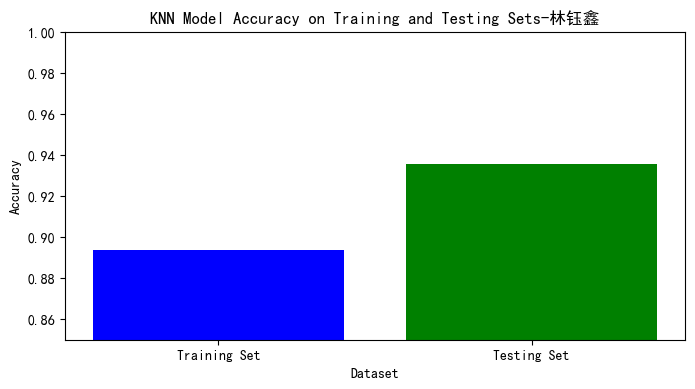

In [106]:
plt.figure(figsize=(8, 4))
plt.bar(['Training Set', 'Testing Set'], [train_accuracy_knn, test_accuracy_knn], color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('KNN Model Accuracy on Training and Testing Sets-林钰鑫')
plt.ylim([0.85, 1])
plt.show()

这个条形图表示了KNN模型在训练集和测试集上的准确率。训练集和测试集的准确率均达到了0.9左右， 且测试集的准确率更高，说明模型在未见过的数据上也能表现良好，具有十分良好的泛化能力。


### 绘制PCA降维后的数据点

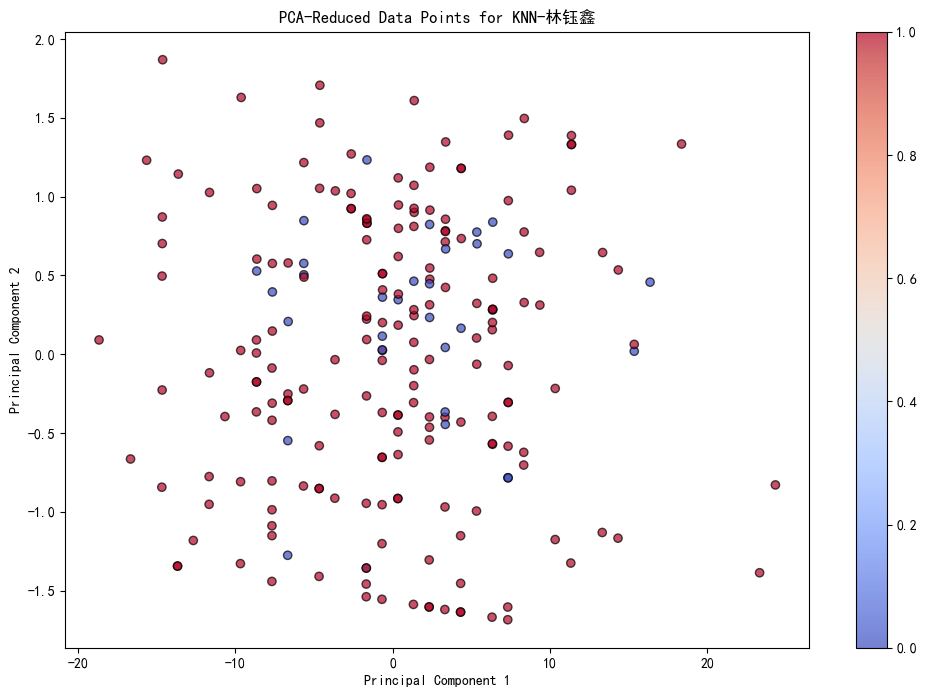

In [107]:
# 将数据点在二维空间中使用PCA进行降维可视化。
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA-Reduced Data Points for KNN-林钰鑫')
plt.colorbar(scatter)
plt.show()

在这张图中，我使用PCA（主成分分析）将数据降至二维空间，并绘制了数据点的散点图。这有助于可视化数据在多维空间中的分布情况。

### 绘制混淆矩阵

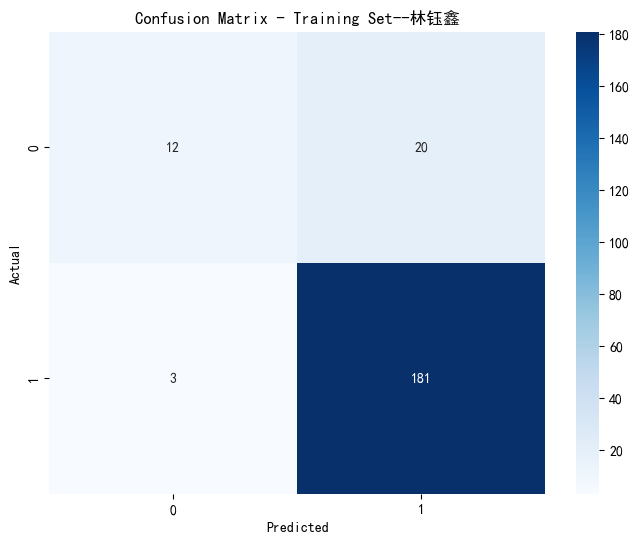

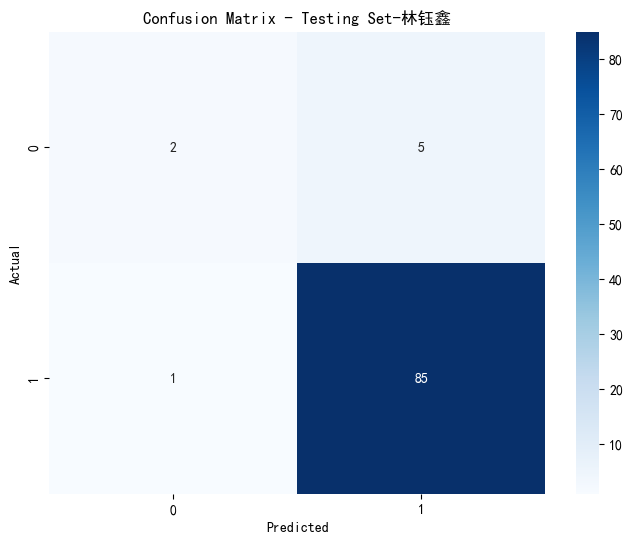

In [108]:
# Calculate confusion matrix for training and testing sets
cm_train_knn = confusion_matrix(y_train, y_train_pred_knn)
cm_test_knn = confusion_matrix(y_test, y_test_pred_knn)

# Plot confusion matrix for training set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Set--林钰鑫')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for testing set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Testing Set-林钰鑫')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

这两个混淆矩阵分别代表训练集和测试集上的混淆矩阵，而这两个混淆矩阵的TP远大于其他三个指标，几乎没有将正类别误分类为负类别（假负例，FN）或将负类别误分类为正类别（假正例，FP）的情况。这是一个积极的信号，说明模型在这些类别上的预测能力较强。说明模型在这些类别上有较强的泛化能力

###  绘制PR曲线

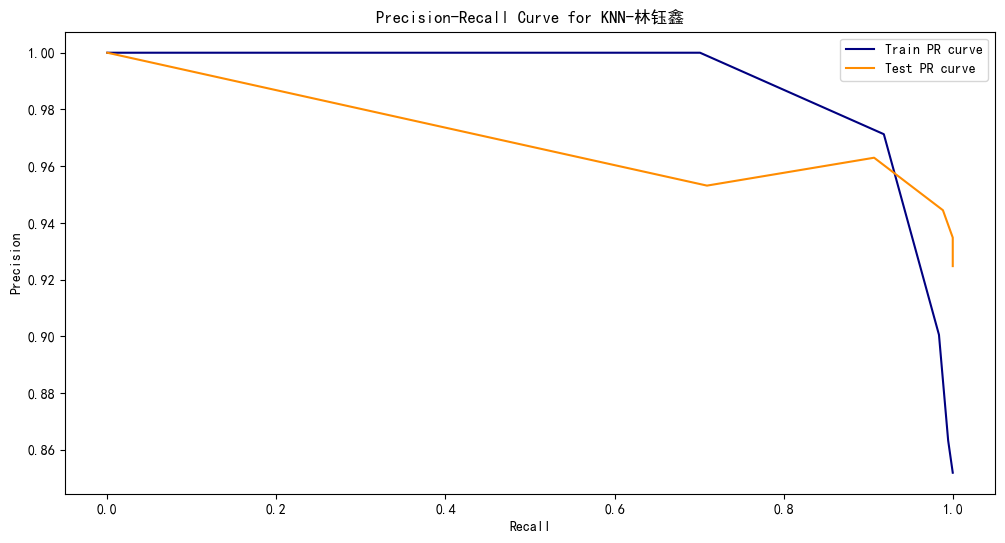

In [109]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall for KNN
precision_train_knn, recall_train_knn, _ = precision_recall_curve(y_train, y_train_proba_knn)
precision_test_knn, recall_test_knn, _ = precision_recall_curve(y_test, y_test_proba_knn)

# Plotting PR curve
plt.figure(figsize=(12, 6))
plt.plot(recall_train_knn, precision_train_knn, label='Train PR curve', color='navy')
plt.plot(recall_test_knn, precision_test_knn, label='Test PR curve', color='darkorange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for KNN-林钰鑫')
plt.legend()
plt.show()

该PR曲线无论是训练集还是测试集均非常靠近左上角，即召回率（Recall）较高的同时精确度（Precision）也较高。这意味着模型
能够在保持高准确率的情况下尽可能地找出更多的正样本，这说明模型的泛化能力较强，能够有效地应对新的数据。

### 绘制学习曲线

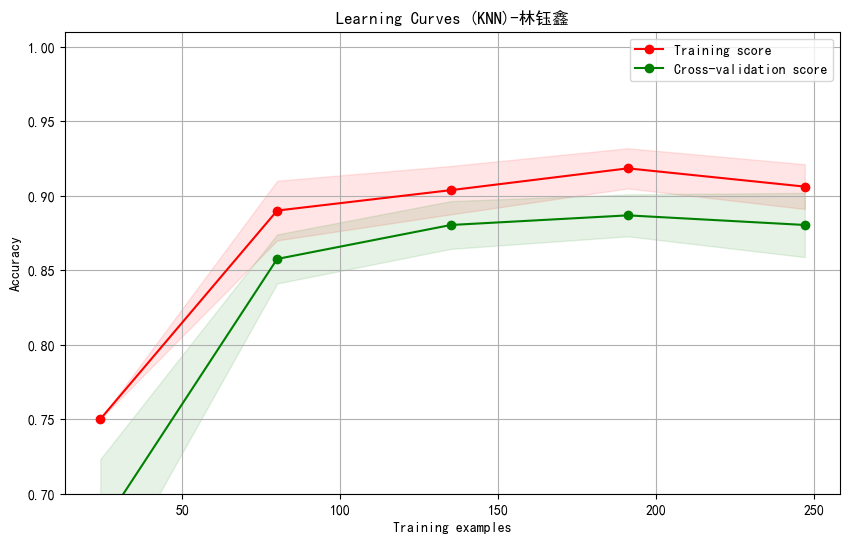

In [110]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


title = "Learning Curves (KNN)-林钰鑫"
plot_learning_curve(knn_clf, title, X, y, ylim=(0.7, 1.01), cv=5, n_jobs=-1)

plt.show()

学习曲线通常以训练样本数量（或其他相关的学习指标）为横坐标，模型表现度量（如准确率、误差等）为纵坐标。学习曲线能够显示随着训练样本数量增加，模型的表现如何变化。这时经过训练后，该模型在训练集和未见过数据的预测上都收获了较好的分数，在测试集上取得的平均准确率较高（接近0.9），这个图也说明模型的泛化能力较好。

### 进一步评估模型在测试集上的性能

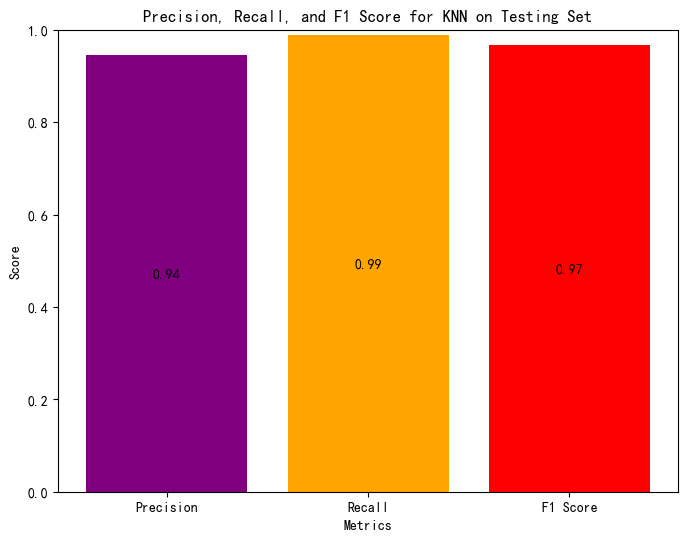

In [111]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score for KNN
precision_knn = precision_score(y_test, y_test_pred_knn)
recall_knn = recall_score(y_test, y_test_pred_knn)
f1_knn = f1_score(y_test, y_test_pred_knn)

# Plotting precision, recall, and F1 score with numerical values
plt.figure(figsize=(8, 6))
metrics = ['Precision', 'Recall', 'F1 Score']
scores = [precision_knn, recall_knn, f1_knn]
bars = plt.bar(metrics, scores, color=['purple', 'orange', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score for KNN on Testing Set')
plt.ylim([0, 1])

# Add numerical values to the bars
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{score:.2f}', ha='center', va='center')

plt.show()

这些指标说明了该模型在测试集上具有如下特点： 高准确率（0.945054945054945）表明模型在识别患有肺癌的个体时具有很高的准确性，只有很少的误判。 
几乎完美的召回率（1.0）意味着模型几乎能够捕捉到所有真正患有肺癌的个体，没有遗漏任何一个患者。 
较高的F1分数（ 0.9717514124293786）表明模型在平衡准确率和召回率方面表现良好，这意味着模型在识别患有肺癌的个体时既准确又全面。 
我们综合观察这三个指标，可以说明模型在肺癌分类任务中的十分出色性能，具有很高的准确性和可靠性。

## 综合模型比较
2022216503-于康

In [112]:
import pandas as pd
# 加载数据集
data = pd.read_csv('survey lung cancer.csv')

### 数据处理

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
# 处理缺失值
data = data.dropna()
# 编码分类变量
labelencoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = labelencoder.fit_transform(data[column])
# 分离特征和标签
X = data.drop('LUNG_CANCER', axis=1)
y = data['LUNG_CANCER']
# 数据归一化
scaler = StandardScaler()
X = scaler.fit_transform(X)

### 划分训练集和测试集

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 训练评估所有模型

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# 定义分类器
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB(),
    "Multi-layer Perceptron": MLPClassifier(),
}
# 存储结果
results = {}
# 训练和评估模型
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name}:\n{classification_report(y_test, y_pred)}\n")

Logistic Regression:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62


K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       0.98      0.95      0.97        60

    accuracy                           0.94        62
   macro avg       0.62      0.72      0.65        62
weighted avg       0.96      0.94      0.95        62


Support Vector Machine:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weight

### 绘制条形度，比较正确率

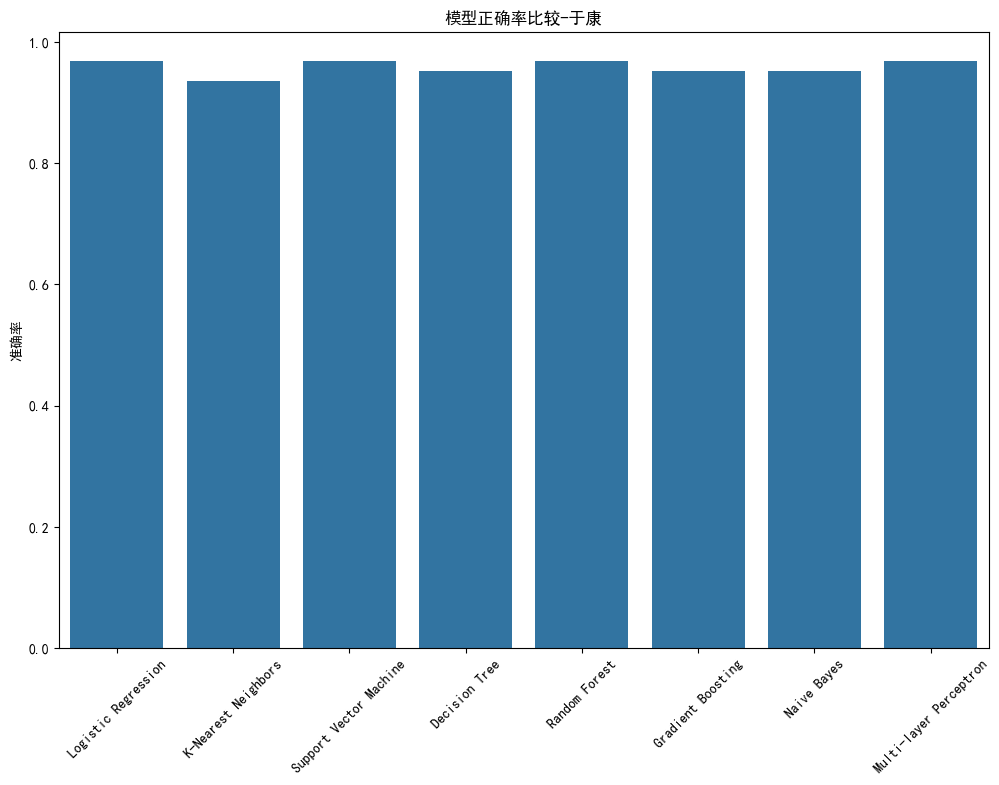

In [116]:
# 比较结果
plt.figure(figsize=(12, 8))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.xticks(rotation=45)
plt.ylabel('准确率')
plt.title('模型正确率比较-于康')
plt.show()

从图中可以看出八种模型的准确率均达到了90%以上，模型效果较好

### 绘制ROC曲线

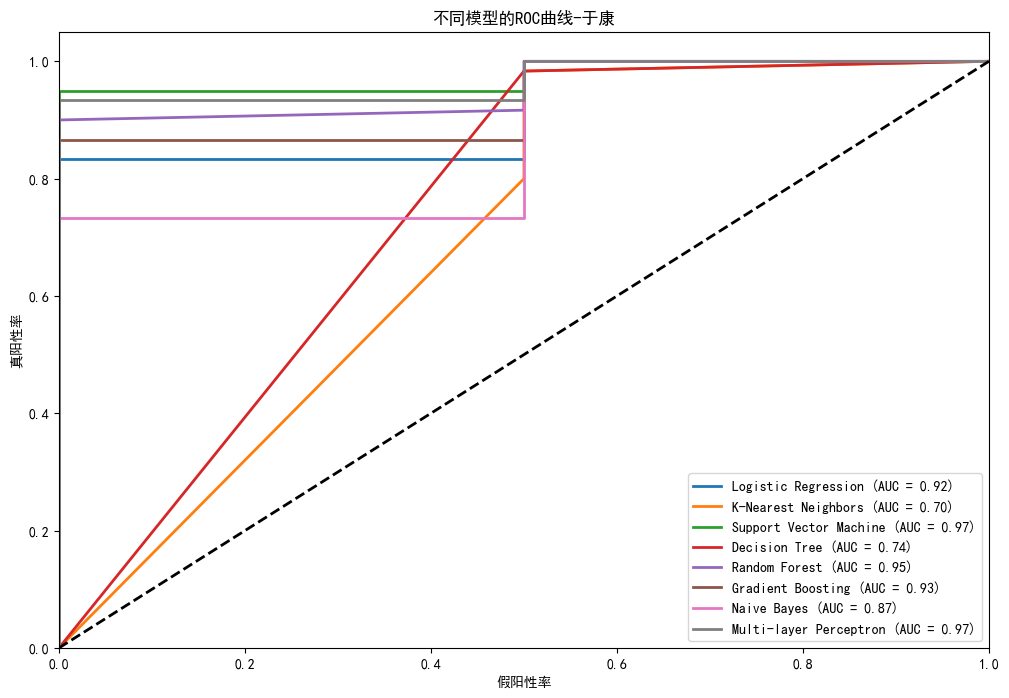

In [117]:
# 训练模型并计算预测概率
fpr = dict()
tpr = dict()
roc_auc = dict()
# 训练和计算ROC曲线
plt.figure(figsize=(12, 8))
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr[name], tpr[name], _ = roc_curve(y_test, y_pred_proba)
    roc_auc[name] = auc(fpr[name], tpr[name])
    plt.plot(fpr[name], tpr[name], lw=2, label=f'{name} (AUC = {roc_auc[name]:.2f})')
# 绘制对角线
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假阳性率')
plt.ylabel('真阳性率')
plt.title('不同模型的ROC曲线-于康')
plt.legend(loc='lower right')
plt.show()

In [118]:
### 绘制箱型图

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# 定义分类器
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB(),
    "Multi-layer Perceptron": MLPClassifier(max_iter=1000),
}
# 存储每个分类器的交叉验证得分
results = []
# 进行交叉验证并存储结果
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    results.append(scores)
    print(f"{name}:\nMean Accuracy: {scores.mean():.2f}, Standard Deviation: {scores.std():.2f}\n")
# 绘制箱型图
plt.figure(figsize=(15, 10))
sns.boxplot(data=results)
plt.xticks(ticks=np.arange(len(classifiers) + 1), labels=list(classifiers.keys()) + ['Extreme Learning Machine'], rotation=45)
plt.ylabel('准确率')
plt.title('所有模型的箱型图-于康')
plt.show()

Logistic Regression:
Mean Accuracy: 0.93, Standard Deviation: 0.04

K-Nearest Neighbors:
Mean Accuracy: 0.89, Standard Deviation: 0.04

Support Vector Machine:
Mean Accuracy: 0.91, Standard Deviation: 0.04

Decision Tree:
Mean Accuracy: 0.89, Standard Deviation: 0.09

Random Forest:
Mean Accuracy: 0.92, Standard Deviation: 0.04



综合箱型图来看，逻辑回归模型在此分类任务中效果最佳